In [3]:

from process import *
from visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# How many files from glycoshape are already compatible with glycontact?

In [2]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    print(x)
    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df = explore_threshold(pdb_file, iupac_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

434
1
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
1
2
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
1
3
threshold:2.4
27
g

In [3]:
success_df = fdf[fdf['success']=='SUCCESS']

In [4]:
success_df #178 -> 274 --> 314 --> 364

glycan  success
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...  SUCCESS
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...  SUCCESS
2                                   GlcNAc(b1-6)GalNAc  SUCCESS
3    Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...  SUCCESS
4                          Neu5Ac(a2-3)Gal(b1-3)GalNAc  SUCCESS
..                                                 ...      ...
429      Neu5Ac(a2-3)Gal(b1-3)GlcNAc(a1-3)Gal(b1-4)Glc  SUCCESS
430  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  SUCCESS
431  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...  SUCCESS
432  Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...  SUCCESS
433  Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)GalNAc(b1-3)Gal(a...  SUCCESS

[363 rows x 2 columns]

In [5]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [6]:
unsuccess_df #256 --> 171 --> 131 --> 81

glycan  \
21   Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...   
22             GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS   
26   Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...   
34                GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc   
37   Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
..                                                 ...   
385  IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-...   
386  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...   
390  GalNAc(b1-4)[Fuc(a1-3)]GlcNAc6Pc(b1-2)Man(a1-3...   
403  Gal(b1-4)Gal(a1-3)[2-4-diacetimido-2-4-6-tride...   
428             GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS   

                                   success  
21                           __CannotBuild  
22                           __CannotBuild  
26                           __CannotBuild  
34                           __CannotBuild  
37                           __CannotBuild  
..                                     ...  
385                          __CannotBuild  
386  _UnexpectedMonosaccharide_CannotBuild  
390                          __CannotBuild  
403  _UnexpectedMonosaccharide_CannotBuild  
428                          __CannotBuild  

[71 rows x 2 columns]

In [7]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52

glycan        success
21   Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...  __CannotBuild
22             GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS  __CannotBuild
26   Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...  __CannotBuild
34                GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc  __CannotBuild
37   Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...  __CannotBuild
..                                                 ...            ...
382           GlcA(b1-4)GlcNAc(a1-4)GlcA2S(b1-4)GlcNAc  __CannotBuild
384  Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-3)[Gal(...  __CannotBuild
385  IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-...  __CannotBuild
390  GalNAc(b1-4)[Fuc(a1-3)]GlcNAc6Pc(b1-2)Man(a1-3...  __CannotBuild
428             GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS  __CannotBuild

[63 rows x 2 columns]

In [89]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [14]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22

glycan  \
85   GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S...   
308  GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcN...   
319  GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA...   
364  GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcN...   
386  Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...   
403  Gal(b1-4)Gal(a1-3)[2-4-diacetimido-2-4-6-tride...   

                                   success  
85   _UnexpectedMonosaccharide_CannotBuild  
308  _UnexpectedMonosaccharide_CannotBuild  
319  _UnexpectedMonosaccharide_CannotBuild  
364  _UnexpectedMonosaccharide_CannotBuild  
386  _UnexpectedMonosaccharide_CannotBuild  
403  _UnexpectedMonosaccharide_CannotBuild

In [16]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6

In [70]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7

glycan           success
134  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...  pdb__CannotBuild
318  GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)Gl...  pdb__CannotBuild
355  Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[G...  pdb__CannotBuild
360  Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[F...  pdb__CannotBuild
371  Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNA...  pdb__CannotBuild
406  Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  pdb__CannotBuild
417          Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man  pdb__CannotBuild

In [17]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)Glc
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions but with different linkage types

In [8]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [9]:
success_df.sort_values(by ='topological_group')

glycan  success  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...  SUCCESS   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...  SUCCESS   
2                                   GlcNAc(b1-6)GalNAc  SUCCESS   
375                                 GlcNAc(b1-3)GalNAc  SUCCESS   
187                                 GalNAc(a1-6)GalNAc  SUCCESS   
..                                                 ...      ...   
424  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...  SUCCESS   
426  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...  SUCCESS   
427             Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc  SUCCESS   
430  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...  SUCCESS   
433  Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)GalNAc(b1-3)Gal(a...  SUCCESS   

                                             nullified  topological_group  
0    SiaHexHexNAc[SiaHexHexNAc]Hex[SiaHexHexNAc[Sia...                  0  
1                      Fuc[Hex]HexNAcHex[Fuc]HexNAcGlc                  1  
2                                         HexNAcGalNAc                  2  
375                                       HexNAcGalNAc                  2  
187                                       HexNAcGalNAc                  2  
..                                                 ...                ...  
424  HexHexHexHexHexHex[HexHex[HexHex]Hex]HexHexNAc...                287  
426  SiaHexHexNAc[HexHexNAc]Hex[HexHexNAc[HexHexNAc...                288  
427                               HexHexNAc[Fuc]HexNAc                289  
430  Fuc[Hex]HexNAcHex[Fuc[Hex]HexNAcHex]HexHexNAc[...                290  
433                         Hex[Fuc]HexHexNAcHexHexGlc                291  

[363 rows x 4 columns]

In [10]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(49, 6), (106, 5), (2, 4), (17, 4), (23, 4), (73, 4), (180, 4), (7, 3), (9, 3), (26, 3), (59, 3), (177, 3), (197, 3), (8, 2), (11, 2), (12, 2), (13, 2), (20, 2), (21, 2), (25, 2), (29, 2), (38, 2), (40, 2), (41, 2), (47, 2), (53, 2), (56, 2), (61, 2), (90, 2), (97, 2), (104, 2), (129, 2), (135, 2), (136, 2), (142, 2), (152, 2), (166, 2), (186, 2), (190, 2), (191, 2), (203, 2), (209, 2), (210, 2), (220, 2), (227, 2), (234, 2), (266, 2), (272, 2), (0, 1), (1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (10, 1), (14, 1), (15, 1), (16, 1), (18, 1), (19, 1), (22, 1), (24, 1), (27, 1), (28, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (39, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (48, 1), (50, 1), (51, 1), (52, 1), (54, 1), (55, 1), (57, 1), (58, 1), (60, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1

In [12]:
success_df['glycan'][success_df['topological_group']==106].to_list()

['Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

In [4]:
g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)

# Building distance tables and other metrics per glycan groups

In [6]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glyc

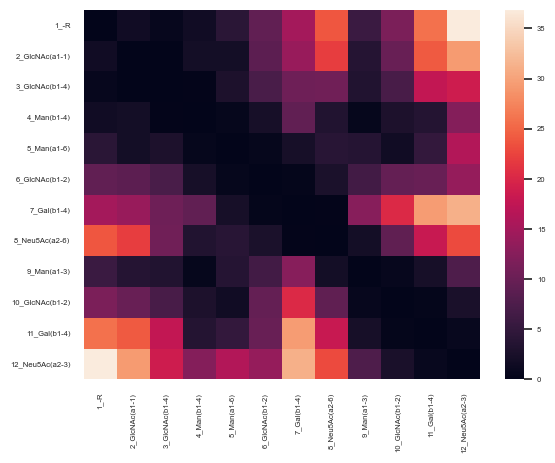

In [341]:
monosaccharide_contact_map(isvt)

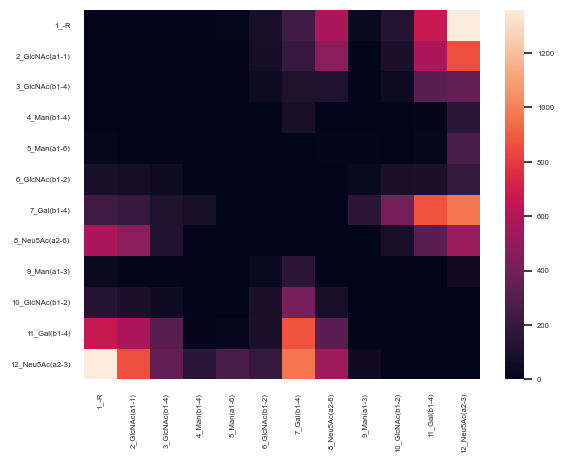

In [342]:
monosaccharide_contact_map(isvt_amplified)

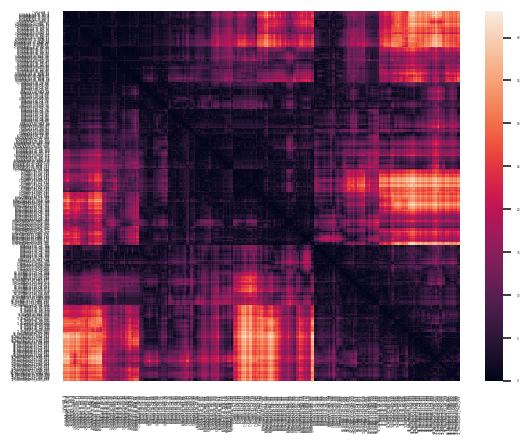

In [343]:
atom_contact_map(atom_isvt,size =0.2)

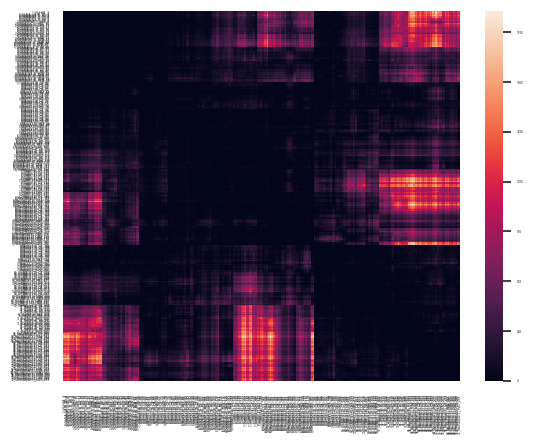

In [344]:
atom_contact_map(atom_isvt_amplified,size =0.2)

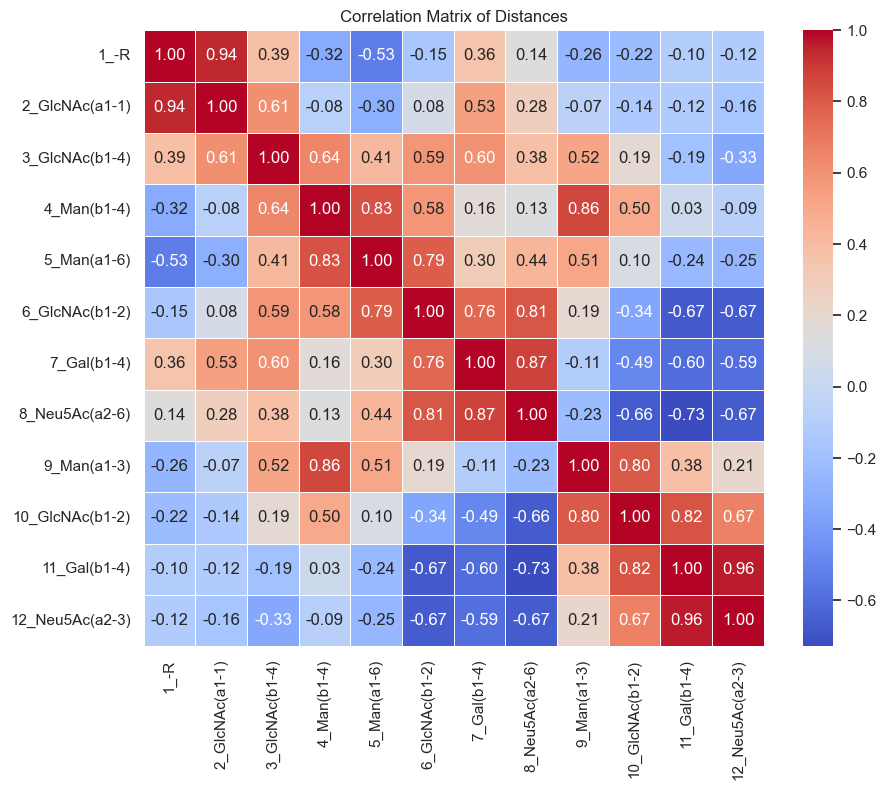

In [345]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

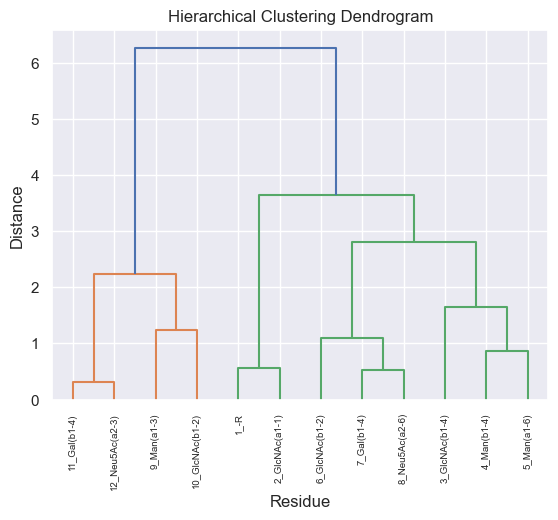

In [346]:
show_correlation_dendrogram(mx, font_size = 7)

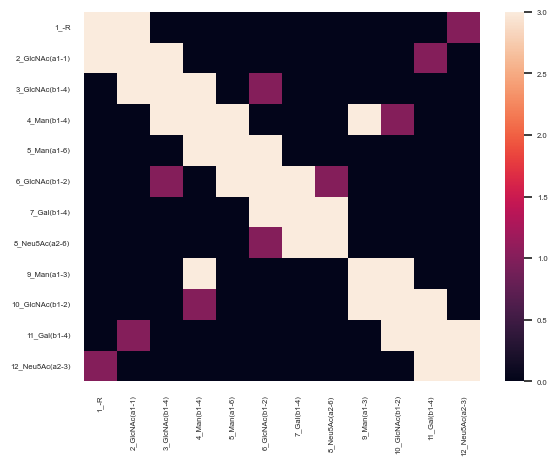

In [347]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

In [348]:
#beta
alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold(f.split('_')[0]+'/'+ f, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detec

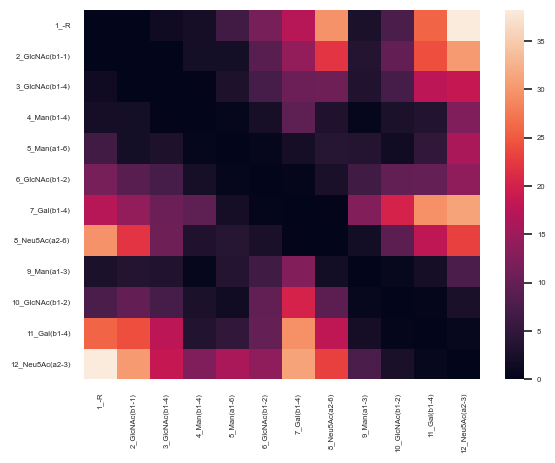

In [349]:
monosaccharide_contact_map(isvt)

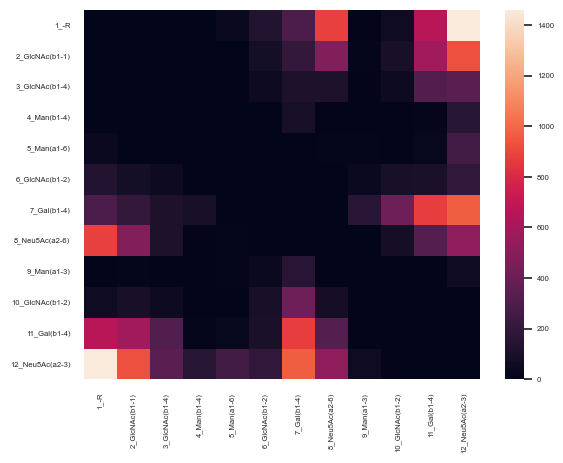

In [350]:
monosaccharide_contact_map(isvt_amplified)

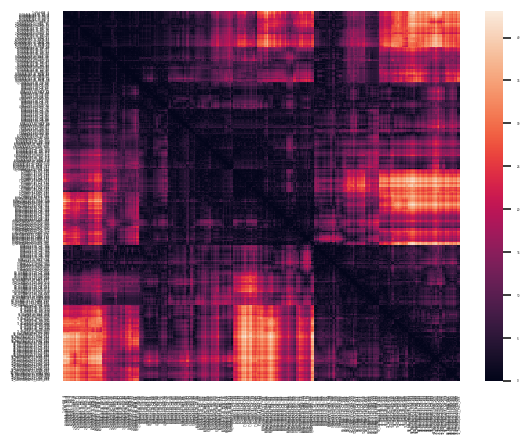

In [351]:
atom_contact_map(atom_isvt,size =0.2)

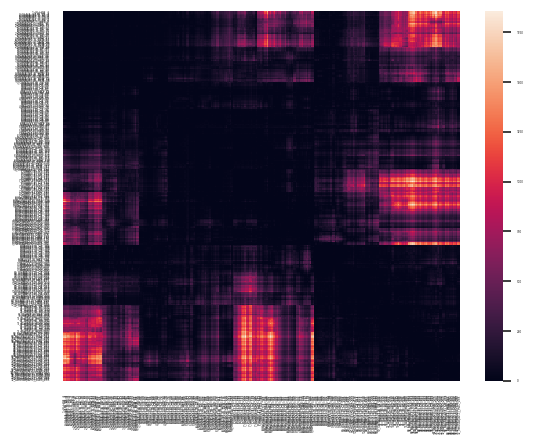

In [352]:
atom_contact_map(atom_isvt_amplified,size =0.2)

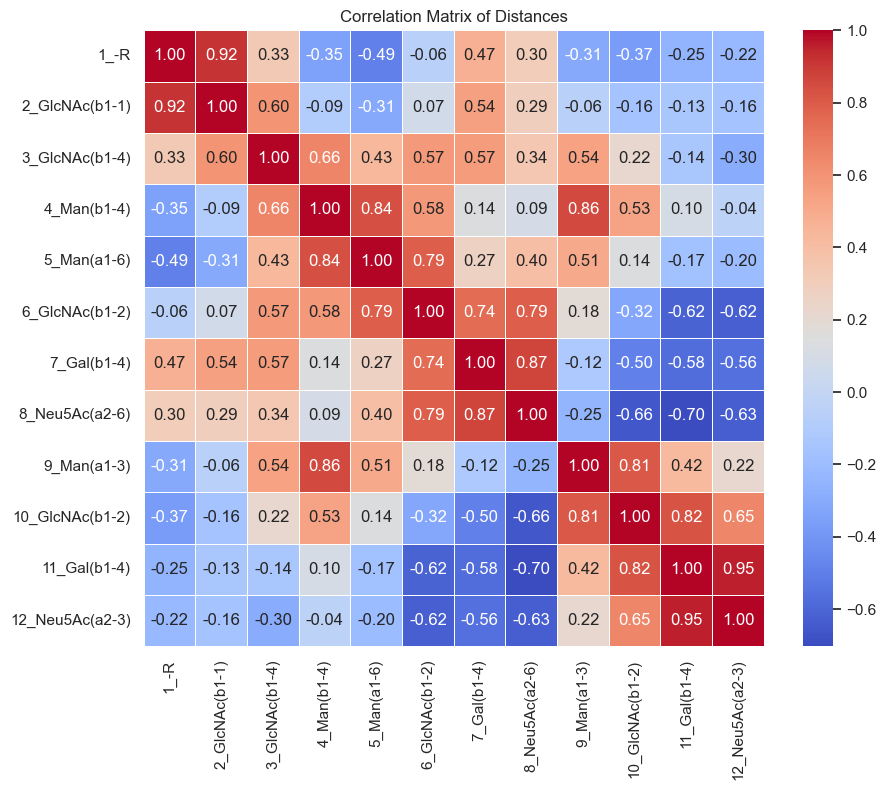

In [353]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [80.0, 80.0, 102.5, 102.5], [52.5, 52.5, 91.25, 91.25], [20.0, 20.0, 71.875, 71.875]]
dcoord[[0.0, 0.3519416794629673, 0.3519416794629673, 0.0], [0.0, 1.1610984776089903, 1.1610984776089903, 0.0], [0.3519416794629673, 2.1361069135333364, 2.1361069135333364, 1.1610984776089903], [0.0, 0.836604080652352, 0.836604080652352, 0.0], [0.0, 1.6102005407082811, 1.6102005407082811, 0.836604080652352], [0.0, 0.5742767875691475, 0.5742767875691475, 0.0], [0.0, 0.5115660362138514, 0.5115660362138514, 0.0], [0.0, 1.1948703669774987, 1.1948703669774987, 0.5115660362138514], [0.5742767875691475, 2.9349060250640373, 2.9349060250640373, 1.1948703669774987], [1.6102005407082811, 3.527548381072158, 3.527548381072158, 2.9349060250640373], [2.1361069135333364, 6.251517134752633, 6.25151713475

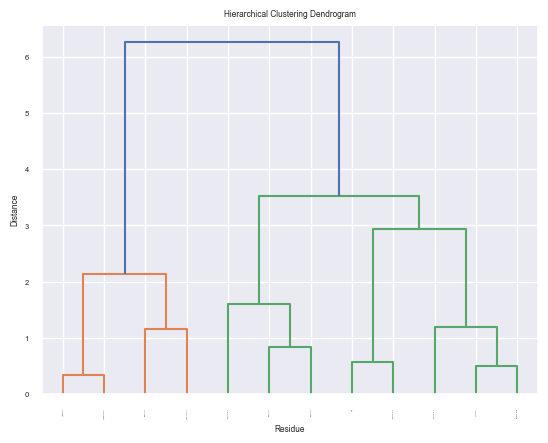

{'C1': ['11_Gal(b1-4)', '12_Neu5Ac(a2-3)', '9_Man(a1-3)', '10_GlcNAc(b1-2)'],
 'C2': ['3_GlcNAc(b1-4)',
  '4_Man(b1-4)',
  '5_Man(a1-6)',
  '1_-R',
  '2_GlcNAc(b1-1)',
  '6_GlcNAc(b1-2)',
  '7_Gal(b1-4)',
  '8_Neu5Ac(a2-6)']}

In [362]:
def show_correlation_dendrogram(corr_df, font_size = 1):
    ### Create a hierarchical clustering dendrogram from a correlation matrix as dataframe (corr_df)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_df.values, method='ward'),
                                    labels=corr_df.columns,
                                    leaf_rotation=90,
                                    leaf_font_size=8,ax=ax
                                    )
    for d in dendrogram :
        print(d + str(dendrogram[d]))
    monolist = dendrogram['ivl']
    clustlist = dendrogram['leaves_color_list']
    uniclustlist =list(set(clustlist))
    res_dict = {}
    #Create a dict with the correlated clusters (=colors on dendrogram) --> 3D regions of glycans highly correlated 
    for c in uniclustlist :
        res_dict[c] = []
    for x in range(0,len(monolist)):
        res_dict[clustlist[x]].append(monolist[x])
    print(res_dict)
    ax.tick_params(axis='x', which='major', labelsize=font_size)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Residue')
    plt.ylabel('Distance')
    plt.show()
    return(res_dict)

show_correlation_dendrogram(mx)

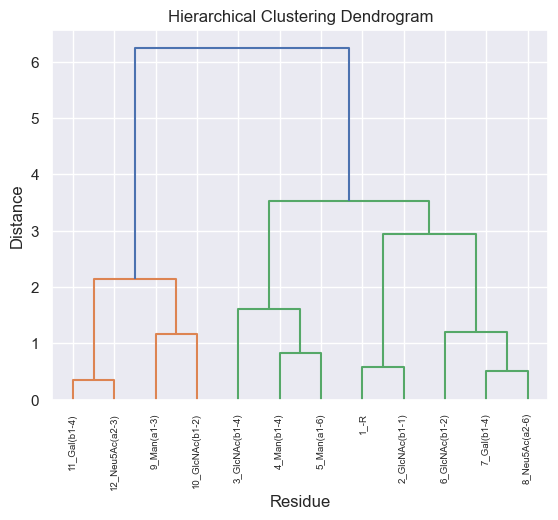

In [354]:
show_correlation_dendrogram(mx, font_size = 7)

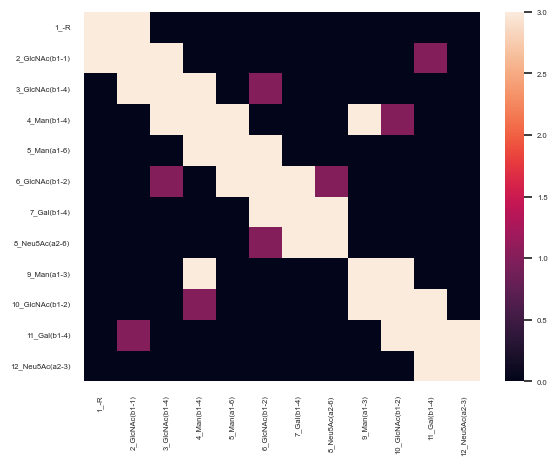

In [355]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Try a pipeline using a2-3 and a2-6 Neu5Ac()

In [39]:
success_list = success_df['glycan'].to_list()
to_process_list = []
for g in success_list :
    if 'a2-3' in g and 'a2-6' in g : 
        to_process_list.append(g)

print(to_process_list)

['Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)]Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc']


In [4]:
#manual to_process_list
to_process_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [5]:
g = to_process_list[10]
#g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)
#alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]

# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs.append(dist_table)


threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glyc

In [6]:
g

'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

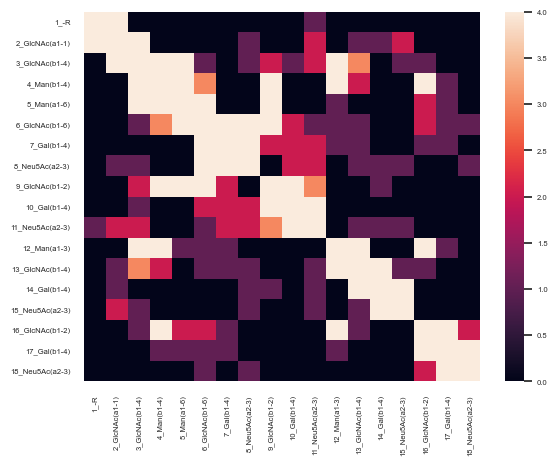

In [7]:
isft = inter_structure_frequency_table(dfs, threshold = 7)
monosaccharide_contact_map(isft)

In [361]:
isft

1_-R  2_GlcNAc(a1-1)  3_GlcNAc(b1-4)  4_Man(b1-4)  \
1_-R                4               4               0            0   
2_GlcNAc(a1-1)      4               4               4            0   
3_GlcNAc(b1-4)      0               4               4            4   
4_Man(b1-4)         0               0               4            4   
5_Man(a1-6)         0               0               4            4   
6_GlcNAc(b1-6)      0               0               1            3   
7_Gal(b1-4)         0               0               0            0   
8_Neu5Ac(a2-3)      0               1               1            0   
9_GlcNAc(b1-2)      0               0               2            4   
10_Gal(b1-4)        0               0               1            0   
11_Neu5Ac(a2-3)     1               2               2            0   
12_Man(a1-3)        0               0               4            4   
13_GlcNAc(b1-4)     0               1               3            2   
14_Gal(b1-4)        0               1               0            0   
15_Neu5Ac(a2-3)     0               2               1            0   
16_GlcNAc(b1-2)     0               0               1            4   
17_Gal(b1-4)        0               0               0            1   
18_Neu5Ac(a2-3)     0               0               0            0   

                 5_Man(a1-6)  6_GlcNAc(b1-6)  7_Gal(b1-4)  8_Neu5Ac(a2-3)  \
1_-R                       0               0            0               0   
2_GlcNAc(a1-1)             0               0            0               1   
3_GlcNAc(b1-4)             4               1            0               1   
4_Man(b1-4)                4               3            0               0   
5_Man(a1-6)                4               4            0               0   
6_GlcNAc(b1-6)             4               4            4               4   
7_Gal(b1-4)                0               4            4               4   
8_Neu5Ac(a2-3)             0               4            4               4   
9_GlcNAc(b1-2)             4               4            2               0   
10_Gal(b1-4)               0               2            2               2   
11_Neu5Ac(a2-3)            0               1            2               2   
12_Man(a1-3)               1               1            1               0   
13_GlcNAc(b1-4)            0               1            1               1   
14_Gal(b1-4)               0               0            0               1   
15_Neu5Ac(a2-3)            0               0            0               1   
16_GlcNAc(b1-2)            2               2            1               0   
17_Gal(b1-4)               1               1            1               0   
18_Neu5Ac(a2-3)            0               1            0               1   

                 9_GlcNAc(b1-2)  10_Gal(b1-4)  11_Neu5Ac(a2-3)  12_Man(a1-3)  \
1_-R                          0             0                1             0   
2_GlcNAc(a1-1)                0             0                2             0   
3_GlcNAc(b1-4)                2             1                2             4   
4_Man(b1-4)                   4             0                0             4   
5_Man(a1-6)                   4             0                0             1   
6_GlcNAc(b1-6)                4             2                1             1   
7_Gal(b1-4)                   2             2                2             1   
8_Neu5Ac(a2-3)                0             2                2             0   
9_GlcNAc(b1-2)                4             4                3             0   
10_Gal(b1-4)                  4             4                4             0   
11_Neu5Ac(a2-3)               3             4                4             0   
12_Man(a1-3)                  0             0                0             4   
13_GlcNAc(b1-4)               0             0                1             4   
14_Gal(b1-4)                  1             0                1             0   
15_Neu5Ac(a2-3)       

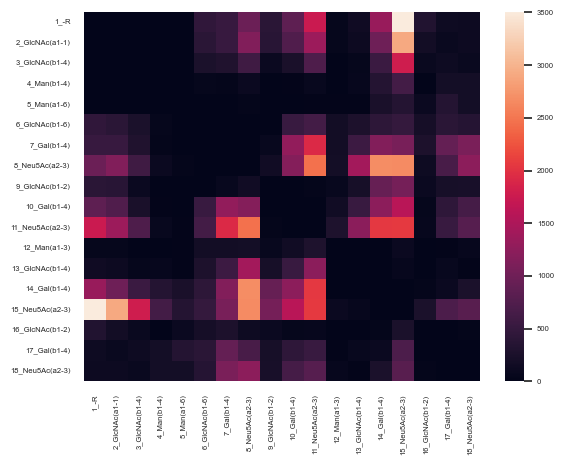

In [8]:
isvt = inter_structure_variability_table(dfs, mode = 'amplify')
monosaccharide_contact_map(isvt)

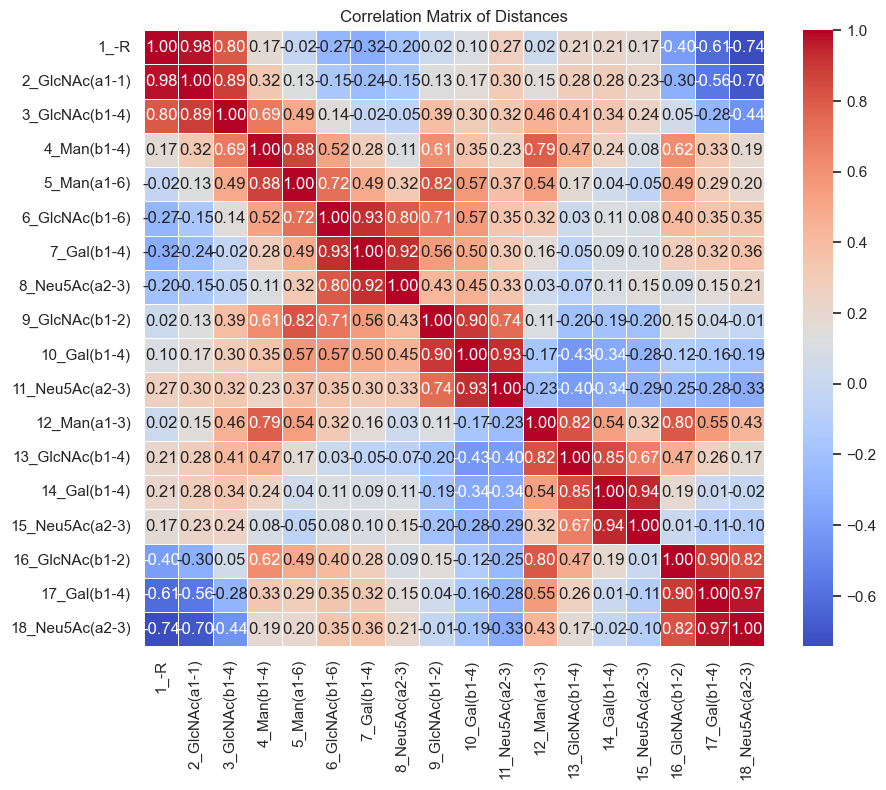

In [9]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

icoord[[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [12.5, 12.5, 42.5, 42.5], [75.0, 75.0, 85.0, 85.0], [65.0, 65.0, 80.0, 80.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [72.5, 72.5, 102.5, 102.5], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [132.5, 132.5, 162.5, 162.5], [87.5, 87.5, 147.5, 147.5], [27.5, 27.5, 117.5, 117.5]]
dcoord[[0.0, 0.44210569726669435, 0.44210569726669435, 0.0], [0.0, 1.0556106406724068, 1.0556106406724068, 0.44210569726669435], [0.0, 0.3698393668352181, 0.3698393668352181, 0.0], [0.0, 1.3179622047505983, 1.3179622047505983, 0.3698393668352181], [1.0556106406724068, 3.6740717657789106, 3.6740717657789106, 1.3179622047505983], [0.0, 0.4865750549494705, 0.4865750549494705, 0.0], [0.0, 0.7898595664841477, 0.7898595664841477, 0.4865750549494705], [0.0, 0.5390637041590366, 0.5390637041590366, 0.0], [0.0, 1.065351517099

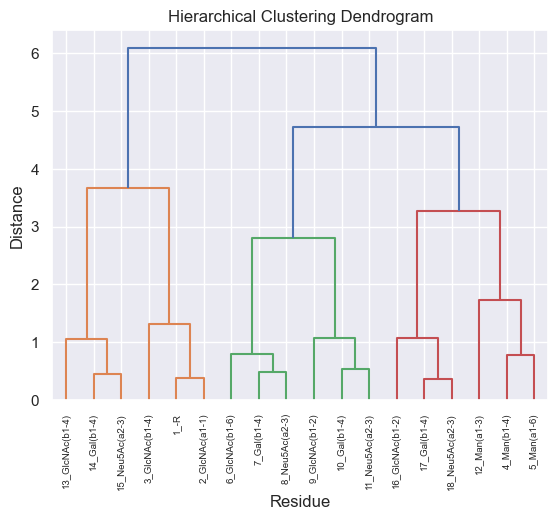

{'C3': ['16_GlcNAc(b1-2)',
  '17_Gal(b1-4)',
  '18_Neu5Ac(a2-3)',
  '12_Man(a1-3)',
  '4_Man(b1-4)',
  '5_Man(a1-6)'],
 'C2': ['6_GlcNAc(b1-6)',
  '7_Gal(b1-4)',
  '8_Neu5Ac(a2-3)',
  '9_GlcNAc(b1-2)',
  '10_Gal(b1-4)',
  '11_Neu5Ac(a2-3)'],
 'C1': ['13_GlcNAc(b1-4)',
  '14_Gal(b1-4)',
  '15_Neu5Ac(a2-3)',
  '3_GlcNAc(b1-4)',
  '1_-R',
  '2_GlcNAc(a1-1)']}

In [365]:
show_correlation_dendrogram(mx, font_size = 7)

In [366]:
residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

sorted_residue_overall_stability = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability)

[('5_Man(a1-6)', 1317.851395), ('12_Man(a1-3)', 1341.356379), ('4_Man(b1-4)', 1687.7641777499998), ('16_GlcNAc(b1-2)', 1808.3711482499994), ('9_GlcNAc(b1-2)', 3921.9242532500007), ('6_GlcNAc(b1-6)', 4577.42190625), ('13_GlcNAc(b1-4)', 4778.642766500001), ('3_GlcNAc(b1-4)', 4908.6056635), ('17_Gal(b1-4)', 4922.23468975), ('18_Neu5Ac(a2-3)', 6187.79117625), ('2_GlcNAc(a1-1)', 8952.780980500002), ('10_Gal(b1-4)', 9480.198835999998), ('7_Gal(b1-4)', 9878.8283715), ('1_-R', 10502.511799249995), ('14_Gal(b1-4)', 12326.079544999999), ('8_Neu5Ac(a2-3)', 15577.928166000003), ('11_Neu5Ac(a2-3)', 15957.799438250007), ('15_Neu5Ac(a2-3)', 20028.625334)]


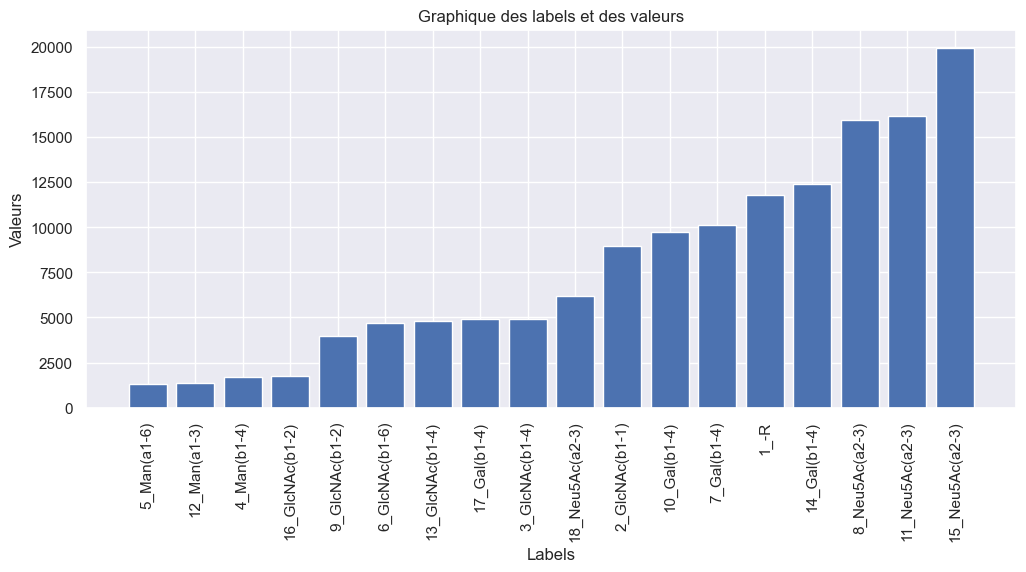

In [358]:
### BETA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'monosaccharide_instabilities.pdf')

plt.show()

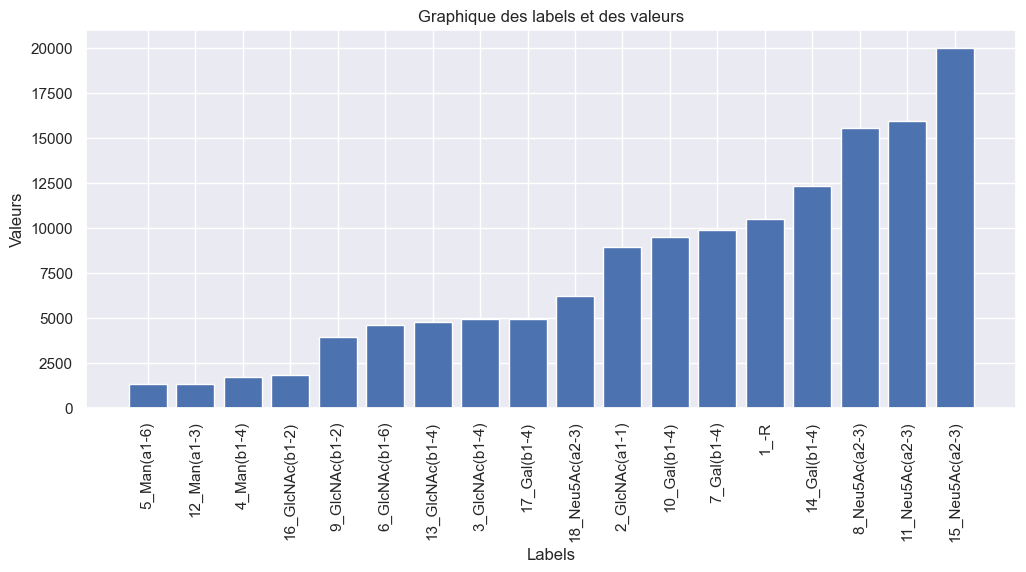

In [367]:
### ALPHA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'alpha_monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'alpha_monosaccharide_instabilities.pdf')

plt.show()

# Investigation of failing glycans

In [375]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc


In [376]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list() #1
for gly in g :
    print(gly)


GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNAc3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNAc3S6S(a1-4)GlcA2S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)G

In [92]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [ ]:

#Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> weird structure on Glycoshape

In [11]:




def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine

  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)

  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  #print(valid_fragments)

  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(pdb_file,threshold)
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  print(mapping_dict)
  print(interaction_dict)
  #print(len(mapping_dict))
  #print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list (binary interactions):" + str(result_list))
  
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(extract_3D_coordinates(pdb_file))
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())
  


In [53]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(pdb_file))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [91]:
def create_mapping_dict_and_interactions(df, valid_fragments) :
  #df is an interaction dataframe as returned by extract_binary_interactions_from_PDB()
  # valid_fragments : obtained from glycowork to ensure that we only append valid monolinks into mapping dict
  mapping_dict = {}
  interaction_dict = {}
  interaction_dict2 = {}
  first_mono_list = df['Atom'].to_list()
  second_mono_list = df['Column'].to_list()
  mapping_dict['1_ROH']='-R'
  wrong_mannose = []
  individual_entities = []

  for m in range(0,len(first_mono_list)) :

    mono = first_mono_list[m].replace("_"+first_mono_list[m].split('_')[-1],'')
    second_mono = second_mono_list[m].replace("_"+second_mono_list[m].split('_')[-1],'')
    first_val = first_mono_list[m].split('_')[-1]
    first_val = extract_numbers(first_val)
    last_val = extract_numbers(second_mono_list[m].split('_')[-1])
    if mono not in individual_entities:
      individual_entities.append(mono)
    if second_mono not in individual_entities:
      individual_entities.append(second_mono)

    if mono.split('_')[1] + '(' + first_val + '-' + last_val + ')' == "MAN(1-4)":
      wrong_mannose.append(mono)

    if second_mono in wrong_mannose :
      second_mono = second_mono.split('_')[0]+"_BMA"

    if mono in wrong_mannose :
      mono = mono.split('_')[0]+"_BMA"
    mapped_to_check = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    #print("mapped_to_check:" + str(mapped_to_check))

    if mapped_to_check in valid_fragments :
      mapping_dict[mono] = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    if mapped_to_check == 'Man(a1-4)':
      mapping_dict[mono] = 'Man(b1-4)'
    if mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check == '-R' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
      mapping_dict[mono] = mapped_to_check


    if mono in interaction_dict :
      if second_mono not in interaction_dict[mono] :
        interaction_dict[mono].append(second_mono)
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']
        interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono] #added but eventually wrong, make everything else fail later
    if mono not in interaction_dict :
      if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
        interaction_dict[mono] = [second_mono]
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'].append(second_mono)

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' not in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono]

  return(mapping_dict, interaction_dict2)

In [90]:
def glycowork_vs_glycontact_interactions(glycowork_interactions, glycontact_interactions) :
  # Take two sets of binary interactions to compare them and return any difference other than GlcNAc-a1-1 and a1-1-R (only considered by glycontact)

  # Convert the lists to sets for easy comparison
  result_set = set(glycontact_interactions)
  interactions_set = set(glycowork_interactions)

  # Calculate the differences
  differences = result_set.symmetric_difference(interactions_set)

  # Convert the differences set back to a list of tuples
  differences_list = list(differences)

  # Pairs to be ignored because specific to glycontact
  ignore_pairs = {('GlcNAc', 'a1-1'), ('a1-1', ' '),('GlcNAc', 'b1-1'), ('b1-1', ' '), ('GalNAc', 'a1-1'), ('GalNAc', 'b1-1'), ('Glc', 'a1-1'), ('Glc', 'b1-1'), ('Rha', 'b1-1'), ('Rha', 'a1-1'), ('Neu5Ac', 'b1-1'), ('Neu5Ac', 'a1-1'), ('Man', 'b1-1'), ('Man', 'a1-1'), ('Gal', 'b1-1'), ('Gal', 'a1-1'), ('Fuc', 'b1-1'), ('Fuc', 'a1-1'), ('Xyl', 'b1-1'), ('Xyl', 'a1-1'), ('GlcA', 'a1-1'), ('GlcA', 'b1-1')}

  # Filter out pairs to be ignored
  filtered_differences = [pair for pair in differences_list if pair not in ignore_pairs]

  # Print or use the filtered_differences as needed
  #print("Filtered Differences:", filtered_differences)
  if filtered_differences == [] and  (len(glycontact_interactions) > len(glycowork_interactions)):
    return(True)
  else :
    if filtered_differences != [] :
      #print('Differences in annotations')
      #print(glycowork_interactions)
      #print(glycontact_interactions)
      return(False)
    if (len(glycontact_interactions) <= len(glycowork_interactions)) :
      #print("Missing monosaccharide in mapping_dict")
      return(False)

In [54]:
def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  #Correcting GLC to GalNAc
  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

In [12]:
glycan = "Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc/Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_alpha_2.pdb
threshold:2.4
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_FUC': 'Fuc(a1-6)', '5_BMA': 'Man(b1-4)'}
{'2_NDG': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH'], '3_FUC': ['3_(a1-6)'], '3_(a1-6)': ['2_NDG'], '5_BMA': ['5_(b1-4)'], '5_(b1-4)': ['4_NAG']}
[('Man', 'b1-4'), ('b1-4', 'GlcNAc'), ('GlcNAc', 'b1-4'), ('b1-4', 'GlcNAc'), ('Fuc', 'a1-6'), ('a1-6', 'GlcNAc')]
result list (binary interactions):[('GlcNAc', 'a1-1'), ('a1-1', ' '), ('Fuc', 'a1-6'), ('a1-6', 'GlcNAc'), ('Man', 'b1-4'), ('b1-4', 'GlcNAc')]
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_FUC': 'Fuc(a1-6)', '5_BMA': 'Man(b1-4)'}
{'2_NDG': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH'], '3_FUC': ['3_(a1-6)'], '3_(a1-6)': ['2_NDG'], '5_BMA': ['

In [440]:
mono = df['monosaccharide'].to_list()
IUPAC = df['IUPAC'].to_list()

for x in range(0,len(mono)):
    print(mono[x],IUPAC[x])

ROH -R
ROH -R
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu

In [76]:
print(df['atom_number'][0])

1


In [43]:
df2 = extract_3D_coordinates(pdb_file)

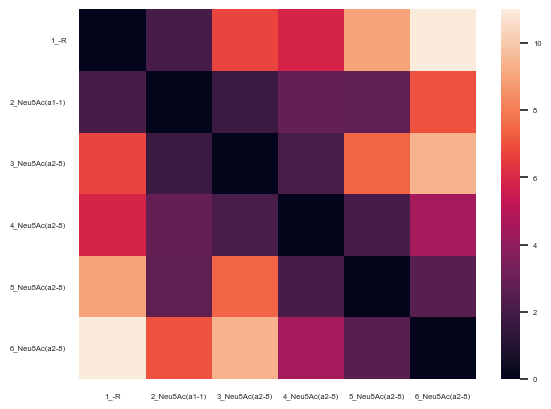

In [77]:
dist_table = make_monosaccharide_contact_table(df,mode='distance')
monosaccharide_contact_map(dist_table)

# Working on Modified (sulfated...) glycans

In [301]:
glycan = "GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS"
#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
#df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb


In [302]:
df2 = extract_3D_coordinates(pdb_file)
print(list(set(df2['monosaccharide'].to_list())))

['BDP', 'SO3', 'ROH', '4YS']


In [303]:
### Strat: detect which component are not monosaccharides.
### For each of them, detect the closest monosaccharide.
### Detect the type of linkage between monosaccharide and modification (to know if it is 6S, 3S...)
### Annotate each non-monosaccharide and its linked monosaccharide with custom annotation in monosaccharide column
### GlcNAc6S : NAG + SO3 + C6-S1 linkage : NAG6S (residue_number = monosaccharide residue number)

# In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                 "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                 "GlcNS6S"
                 ]
### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

# List of non-monosaccharide
non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

# Dict of modifications {link_modif:IUPAC} 
#modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

# Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
              "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
              "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
              "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}

# To modify dict
to_modify_dict = {}

modified_glycan = False 
for mm in modified_mono :
    if mm in glycan : 
        modified_glycan = True

if modified_glycan == True :
    pdb_path = "glycans_pdb/"+glycan
    pdbs = check_available_pdb(pdb_path)

    pdb_file = pdb_path + "/" + pdbs[0]
    print(pdb_file)

    df = extract_3D_coordinates(pdb_file)

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono
    print(resdict)

    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]
            print(sugar_partner)

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]


            print(link_pos)
            print(modif)
            print(modified_mono)
            print(modified_mono_iupac)
            print("stop")

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]

print(to_modify_dict)


# charger la dataframe à partir du fichier file.pdb
df = extract_3D_coordinates(pdb_file)

# parcourir chaque ligne de la dataframe et appliquer les règles
for index, row in df.iterrows():
    residue_number = row['residue_number']
    if residue_number in to_modify_dict:
        if type(to_modify_dict[residue_number]) is str : 
            monosaccharide = to_modify_dict[residue_number]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
        
        if type(to_modify_dict[residue_number]) is list:
            monosaccharide = to_modify_dict[residue_number][0]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
            new_residue_number = int(to_modify_dict[residue_number][1])
            df.at[index, 'residue_number'] = new_residue_number

# conserver la dataframe modifiée en variable
df_modified = df.copy()
new_df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

# afficher le résultat
##print("Nom de la colonne :", col_name)
#print("Index de la ligne :", row_index)


        




glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb
{1: 'ROH', 2: '4YS', 3: 'BDP', 4: '4YS', 5: 'BDP', 6: 'SO3'}
3_BDP_O2_45
2
2SO3
BDP2SO3
GlcA2S
stop
{3: 'BDP2SO3', 6: ['BDP2SO3', '3']}
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3


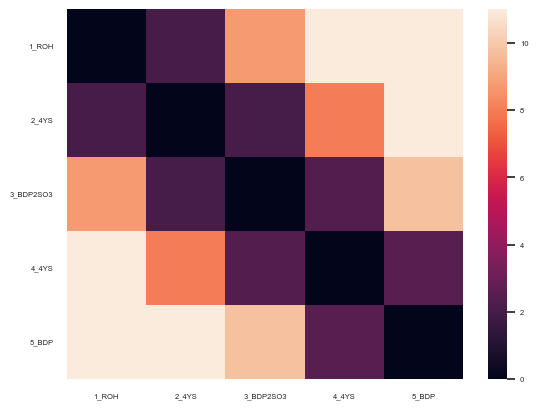

In [304]:
dist_table = make_monosaccharide_contact_table(new_df, mode="distance")
monosaccharide_contact_map(dist_table)

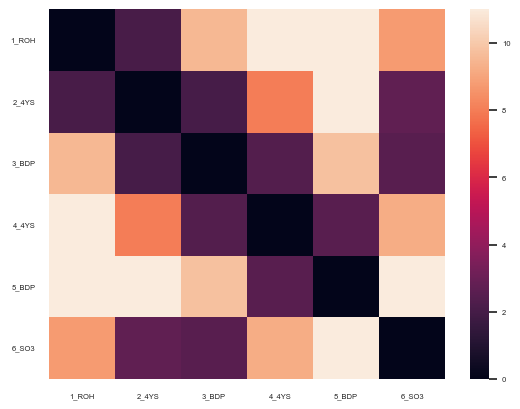

In [305]:
dist_table = make_monosaccharide_contact_table(df2, mode="distance")
monosaccharide_contact_map(dist_table)

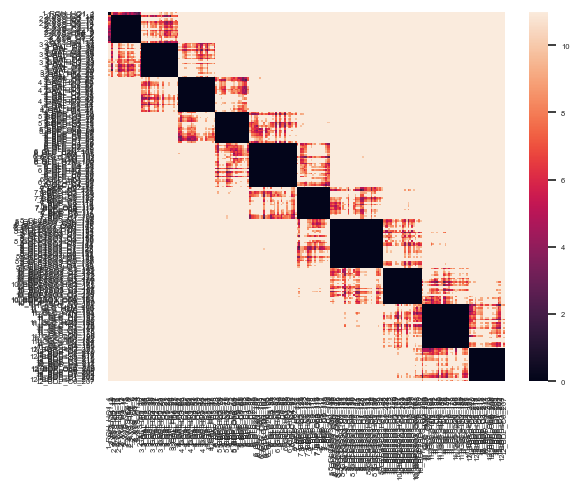

In [143]:
dist_table = make_atom_contact_table(new_df)
monosaccharide_contact_map(dist_table)

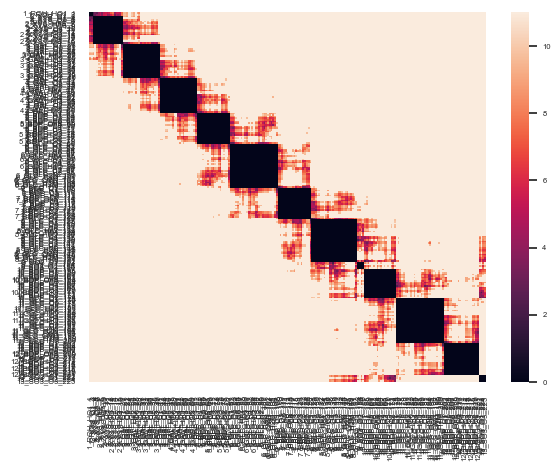

In [144]:
dist_table = make_atom_contact_table(df2)
monosaccharide_contact_map(dist_table)

# New annotation pipeline

## Continue here, check why some are still failing with modified monosacs

In [2]:

def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

def annotate_pdb_data(pdb_dataframe, mapping_dict) :
  mono_list = pdb_dataframe['monosaccharide'].to_list()
  id_list = pdb_dataframe['residue_number'].to_list()
  m_dict = copy.deepcopy(mapping_dict)
  for m in m_dict :
    if "BMA" in m :
      mapping_dict[m.split('_')[0]+"_"+"MAN"] = mapping_dict[m] #restore the corrected mannose into a wrong one for annotation
  IUPAC = []
  for m in range(0,len(mono_list)):
    monosaccharide = str(id_list[m]) + "_" + mono_list[m]
    try :
      IUPAC.append(mapping_dict[monosaccharide])
    except :
      IUPAC.append(mono_list[m])
  pdb_dataframe['IUPAC']= IUPAC
  return(pdb_dataframe)

def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine


  # In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
  modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                  "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                  "GlcNS6S"
                  ]
  ### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

  # List of non-monosaccharide
  non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

  # Dict of modifications {link_modif:IUPAC} 
  #modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

  # Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
  custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
                "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
                "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
                "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}
  
  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)


  # To modify dict
  to_modify_dict = {}

  df = extract_3D_coordinates(pdb_file)

  modified_glycan = False 
  for mm in modified_mono :
      if mm in glycan_sequence : 
          modified_glycan = True

  if modified_glycan == True :
    print("MODIFIED GLYCAN")

    

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono


    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]

            #print(link_pos)
            #print(modif)
            #print(modified_mono)
            #print(modified_mono_iupac)

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]




    # charger la dataframe à partir du fichier file.pdb
    df = extract_3D_coordinates(pdb_file)

    # parcourir chaque ligne de la dataframe et appliquer les règles
    for index, row in df.iterrows():
        residue_number = row['residue_number']
        if residue_number in to_modify_dict:
            if type(to_modify_dict[residue_number]) is str : 
                monosaccharide = to_modify_dict[residue_number]
                df.at[index, 'monosaccharide'] = monosaccharide
            
            if type(to_modify_dict[residue_number]) is list:
                monosaccharide = to_modify_dict[residue_number][0]
                df.at[index, 'monosaccharide'] = monosaccharide
                new_residue_number = int(to_modify_dict[residue_number][1])
                df.at[index, 'residue_number'] = new_residue_number

    # conserver la dataframe modifiée en variable
    df_modified = df.copy()
    df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

  
  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  print(valid_fragments)
  print(list(set(df['monosaccharide'].to_list())))
  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(df,threshold)
  print("BinInt Extracted --->>><<<")
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  print(mapping_dict)
  print(interaction_dict)
  print(len(mapping_dict))
  print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list:" + str(result_list))
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(df)
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())

In [3]:
glycan_list = ["Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose","GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA",
               "Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S",
               "GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl","GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "Fuc(a1-2)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc","Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc","Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc","Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc",
               "GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc","GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc6S","Fuc(a1-2)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc","GlcA3S(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "Neu5Ac9Me(a2-3)Gal(b1-3)GlcNAc","Neu5Gc9Me(a2-3)Gal(b1-3)GlcNAc","GlcA4Me(b1-6)Gal(b1-6)Gal(b1-6)Gal(b1-6)Gal","Neu5Ac9Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc","Gal(b1-4)GlcNAc(b1-3)Gal6S(b1-4)GlcNAc6S(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "GlcA3S(b1-3)Gal(b1-4)GlcNAc(b1-2)Man","GlcA(b1-4)GlcNAc(a1-4)GlcA2S(b1-4)GlcNAc6S","GlcA3S(b1-3)Gal(b1-4)GlcNAc","GlcA(b1-4)GlcNAc(a1-4)GlcA2S(b1-4)GlcNAc","IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-4)IdoA(a1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "GalNAc(b1-4)[Fuc(a1-3)]GlcNAc6Pc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S","IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S","GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA",
               "GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S","IdoA2S(a1-4)GlcNS6S","IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S","GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS","GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S","GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNS6S","GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS","Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc","GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS","GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc","Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac","Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Fuc","Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc","Xyl","Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc","Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac","Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)Gal(a1-6)]Man","Glc","Man(b1-2)Man(b1-2)Man(a1-2)Man(a1-2)Man(a1-2)Man","Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Neu5Ac9Ac(a2-6)Gal(b1-4)GlcNAc","Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc","GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA","Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc","Gal(b1-4)GlcNAc(b1-4)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","GalNAc(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA","Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac","Man(a1-3)Man","Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc","GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S","GalA(a1-4)GlcA(b1-4)Glc","Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha","Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc","GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA","GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNAc3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNAc3S6S(a1-4)GlcA2S","Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"]



In [4]:
#glycan_list = ['Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS']
success_fail_list = []
x =1

for g_index in range(0,len(glycan_list)) :

    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + glycan_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + glycan_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        print(glycan_list[g_index])
        df = explore_threshold(pdb_file, glycan_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
        print("DONE")
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = glycan_list
fdf['success'] = success_fail_list 

Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
threshold:2.4
['Gal(b1-4)', 'Gal(a1-3)']
['GAL', 'ROH', 'BCA', 'GLA']
BinInt Extracted --->>><<<
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
threshold:2.4
MODIFIED GLYCAN
['IdoA2S(a1-4)', 'GlcNAc(a1-4)', 'GlcNAc6S(a1-4)', 'GlcA(b1-4)', 'GlcNS(a1-4)', 'GlcNS(a1-4)', 'GlcNS6S(a1-4)', 'IdoA(a1-4)', 'GlcA(b1-4)']
['NDG6SO3', '0YS', 'ROH', 'IDR', 'UYS6SO3', 'BDP', 'NDG']
BinInt Extracted --->>><<<
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
threshold:2.4
MODIFIED GLYCAN
['Gal(b1-4)', 'Fuc(a1-6)', 'Gal(b1-4)', 'Man(b1-4)', 'Man(a1-6)', 'GlcNAc(b1-4)', 'GlcNAc6S(b1-2)', 'Man(a1-3)', 'GlcNAc(b1-2)']
['NAG6SO3', 'FUC', 'ROH', 'MAN', 'NAG', 'GAL', 'NDG']
BinInt Extracted --->>><<<
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_NAG': 'GlcNAc(b1-4)', '4_BMA': 'Man(b1-4)', '5_MAN': 'Man(a1-3)', '7_GAL': 'Gal(b1-4)', '8_MAN': '

In [7]:
fdf['glycan'][fdf['success']!='SUCCESS'].to_list()

['Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose',
 'GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA',
 'GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl',
 'GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl',
 'Fuc(a1-2)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc',
 'Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc',
 'Fuc(a1-2)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc',
 'Neu5Ac9Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc',
 'Gal(b1-4)GlcNAc(b1-3)Gal6S(b1-4)GlcNAc6S(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl',
 'IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-4)IdoA(a1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl',
 'GalNAc(b1-4)[Fuc(a1-3)]GlcN

# Implementation of Solvent Accessible Surface Area (SASA)

In [1]:
!pip3 install git+https://github.com/BojarLab/glycowork.git@dev


  Cloning https://github.com/BojarLab/glycowork.git (to revision dev) to /private/var/folders/q_/4h2z02_d6bg3v0f1v46vtch80000gn/T/pip-req-build-06u4qz6t
  Running command git clone --filter=blob:none --quiet https://github.com/BojarLab/glycowork.git /private/var/folders/q_/4h2z02_d6bg3v0f1v46vtch80000gn/T/pip-req-build-06u4qz6t
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Resolved https://github.com/BojarLab/glycowork.git to commit 0cb3cc10aa997db5b2d900165f47dca0b13e1fb4
  Preparing metadata (setup.py) ... done


In [2]:
!pip3 install glycowork[draw]

zsh:1: no matches found: glycowork[draw]


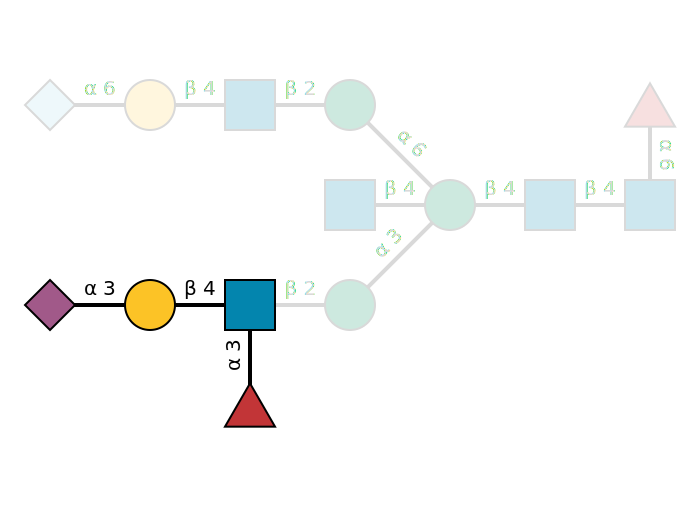

In [3]:
#drawing publication-quality glycan figures
#!/usr/local/bin/python3.12.1

from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc")

In [5]:
!pip3 install plotly imageio

     |████████████████████████████████| 16.4 MB 6.4 MB/s eta 0:00:01     |███████████████████████████▊    | 14.2 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 44.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [4]:
!pip3 install MDAnalysis

In [6]:
!pip3 install mdtraj

     |████████████████████████████████| 1.3 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
from process import *
from visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:

g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)

In [4]:
pdbs

['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_3.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_3.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_2.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_2.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_0.pdb',
 'N

In [5]:
import MDAnalysis as mda
import mdtraj as md
from mdtraj.core.topology import Topology
from mdtraj.core.trajectory import Trajectory


# Load PDB file
pdb_file = "/Users/lucthomes/Desktop/REPOSITORIES/Glycontact/glycans_pdb/" + g + "/" + pdbs[0]


# Load the PDB file
structure = md.load(pdb_file)

# Calculate SASA
sasa = md.shrake_rupley(structure, mode='atom')

# Print the SASA for each atom
highest = ''
highval = 0
for i, atom_sasa in enumerate(sasa[0]):
    atom = structure.topology.atom(i)
    print(f"Atom {atom.name} ({atom.residue.name} {atom.residue.resSeq}): {atom_sasa} Å²")
    if atom_sasa > highval :
        highval = atom_sasa
        highest = str(atom.name) +'_'+ str(atom.residue.name) + '_' +  str(atom.residue.resSeq)

    



Atom HO1 (ROH 1): 0.0937974825501442 Å²
Atom O1 (ROH 1): 0.12388744950294495 Å²
Atom C1 (NAG 2): 0.0012579461326822639 Å²
Atom H1 (NAG 2): 0.1858251988887787 Å²
Atom C2 (NAG 2): 0.0 Å²
Atom H2 (NAG 2): 0.0 Å²
Atom N2 (NAG 2): 0.0068349288776516914 Å²
Atom H2N (NAG 2): 0.13184739649295807 Å²
Atom C2N (NAG 2): 0.025158923119306564 Å²
Atom CME (NAG 2): 0.10692542046308517 Å²
Atom H3M (NAG 2): 0.2194507122039795 Å²
Atom H2M (NAG 2): 0.14158110320568085 Å²
Atom H1M (NAG 2): 0.25219133496284485 Å²
Atom O2N (NAG 2): 0.01116103120148182 Å²
Atom C3 (NAG 2): 0.0 Å²
Atom H3 (NAG 2): 0.10264629870653152 Å²
Atom O3 (NAG 2): 0.0256703719496727 Å²
Atom H3O (NAG 2): 0.0008848818833939731 Å²
Atom C4 (NAG 2): 0.0 Å²
Atom H4 (NAG 2): 0.0 Å²
Atom C5 (NAG 2): 0.0 Å²
Atom H5 (NAG 2): 0.1291927546262741 Å²
Atom C6 (NAG 2): 0.006289730779826641 Å²
Atom H62 (NAG 2): 0.02212204784154892 Å²
Atom H61 (NAG 2): 0.24245764315128326 Å²
Atom O6 (NAG 2): 0.0011161031434312463 Å²
Atom H6O (NAG 2): 0.0 Å²
Atom O5 (NAG 2)

In [12]:
print(highval)
print(highest)

0.3951005
O1B_SIA_18


In [15]:
import mdtraj as md

# Load the PDB file
structure = md.load(pdb_file)

# Calculate SASA for each atom
sasa = md.shrake_rupley(structure, mode='atom')

# Calculate the SASA for each monosaccharide
monosaccharide_sasa = {}
for atom in structure.topology.atoms:
    resSeq = atom.residue.resSeq
    resName = atom.residue.name
    if resSeq not in monosaccharide_sasa:
        monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
    monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

# Print the SASA for each monosaccharide
for resSeq, data in monosaccharide_sasa.items():
    resName = data['resName']
    sasa = data['sasa']
    print(f"Monosaccharide {resName} ({resSeq}): {sasa} Å²")




Monosaccharide ROH (1): 0.21768493205308914 Å²
Monosaccharide NAG (2): 1.7152953135664575 Å²
Monosaccharide NAG (3): 1.2764116724720225 Å²
Monosaccharide MAN (4): 0.8149109440855682 Å²
Monosaccharide MAN (5): 1.3033371741184965 Å²
Monosaccharide NAG (6): 1.74355080537498 Å²
Monosaccharide GAL (7): 1.1104059256613255 Å²
Monosaccharide SIA (8): 2.974141409038566 Å²
Monosaccharide NAG (9): 1.374416024889797 Å²
Monosaccharide GAL (10): 1.0159217684413306 Å²
Monosaccharide SIA (11): 1.668051130603999 Å²
Monosaccharide MAN (12): 1.2017195192165673 Å²
Monosaccharide NAG (13): 1.9825150754768401 Å²
Monosaccharide GAL (14): 1.4916340101044625 Å²
Monosaccharide SIA (15): 3.403936730697751 Å²
Monosaccharide NAG (16): 2.3067517939489335 Å²
Monosaccharide GAL (17): 1.5263933958485723 Å²
Monosaccharide SIA (18): 4.250347645953298 Å²


In [13]:

pdbs = check_available_pdb("glycans_pdb/"+g)
beta_pdbs = ["glycans_pdb/"+g+"/"+pdb for pdb in pdbs if 'beta' in pdb]
alpha_pdbs = ["glycans_pdb/"+g+"/"+pdb for pdb in pdbs if 'alpha' in pdb]

In [17]:
pdbs

['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_3.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_3.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_2.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_2.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_0.pdb',
 'N

In [18]:
pdb

Automatic pdb calling has been turned ON


In [14]:
print(beta_pdbs)

['glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_3.pdb', 'glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_2.pdb', 'glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Ga

In [8]:
glycan = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

pdbs = check_available_pdb("glycans_pdb/"+glycan)
pdb_files = ["glycans_pdb/"+glycan+"/"+pdb for pdb in pdbs]
for pdb in pdb_files :
    print(pdb)

glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_3.pdb
glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_3.pdb
glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)

In [19]:
a =[20,40]
print(a/100)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [4]:
get_sasa_table('Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc')


glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_0.pdb


NameError: name 'md' is not defined

In [16]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['gc26132616c0b.pdb', 'gc26132616c1b.pdb', 'gc26132616c2b.pdb','gc26132616c3b.pdb','gc26132616c4b.pdb','gc26132616c5b.pdb','gc26132616c6b.pdb']

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:
    print(pdb_file)
    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1,1,1,1] # cluster frequencies
    try :
        weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    except :
        weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
        weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table)


glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_3.pdb
glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_beta_2.pdb
glycans_pdb/Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc/Neu5Ac(a2-3)Gal(b1-4)G

Monosaccharide_id Monosaccharide  Mean Score  Median Score  \
0                   1             -R    0.376743      0.406411   
1                   2   GlcNAc(b1-1)    2.478841      2.629583   
2                   3      Fuc(a1-6)    1.926632      1.986012   
3                   4   GlcNAc(b1-4)    0.869504      0.854764   
4                   5      Man(b1-4)    1.129418      1.227519   
5                   6      Man(a1-6)    1.724005      1.563247   
6                   7   GlcNAc(b1-2)    1.251053      1.160906   
7                   8      Gal(b1-4)    3.247980      3.124284   
8                   9   Neu5Gc(a2-6)    1.783540      1.879989   
9                  10      Man(a1-3)    1.364960      1.366820   
10                 11   GlcNAc(b1-2)    3.118002      3.371572   
11                 12      Gal(b1-4)    0.938893      1.029296   
12                 13   Neu5Gc(a2-6)    2.125381      2.032708   
13                 14            NaN    1.581266      1.552408   
14                 15            NaN    3.381679      3.348616   
15                 16            NaN    2.128812      2.190568   
16                 17            NaN    1.471334      1.635320   
17                 18            NaN    4.102866      4.234164   

    Weighted Score  Standard Deviation  Coefficient of Variation  
0         0.376743            0.096381                  0.255827  
1         2.478841            0.471142                  0.190065  
2         1.926632            0.474065                  0.246059  
3         0.869504            0.053907                  0.061997  
4         1.129418            0.218040                  0.193056  
5         1.724005            0.456892                  0.265018  
6         1.251053            0.242864                  0.194128  
7         3.247980            0.595990                  0.183496  
8         1.783540            0.241319                  0.135304  
9         1.364960            0.336508                  0.246533  
10        3.118002            0.929602                  0.298140  
11        0.938893            0.288412                  0.307183  
12        2.125381            0.264935                  0.124653  
13        1.581266            0.145641                  0.092104  
14        3.381679            0.605910                  0.179174  
15        2.128812            0.206925                  0.097202  
16        1.471334            0.394664                  0.268236  
17        4.102866            0.262551                  0.063992

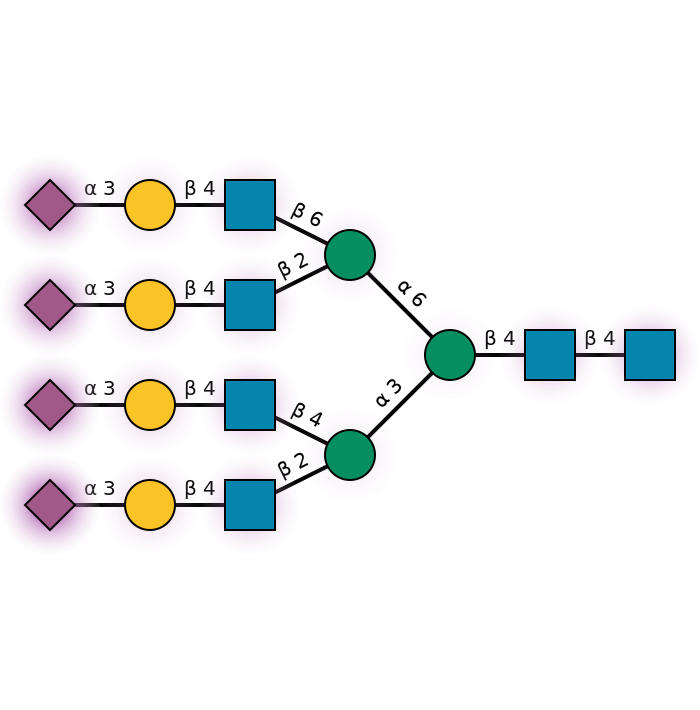

In [50]:
lst = table['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g, per_residue= normalized_lst)

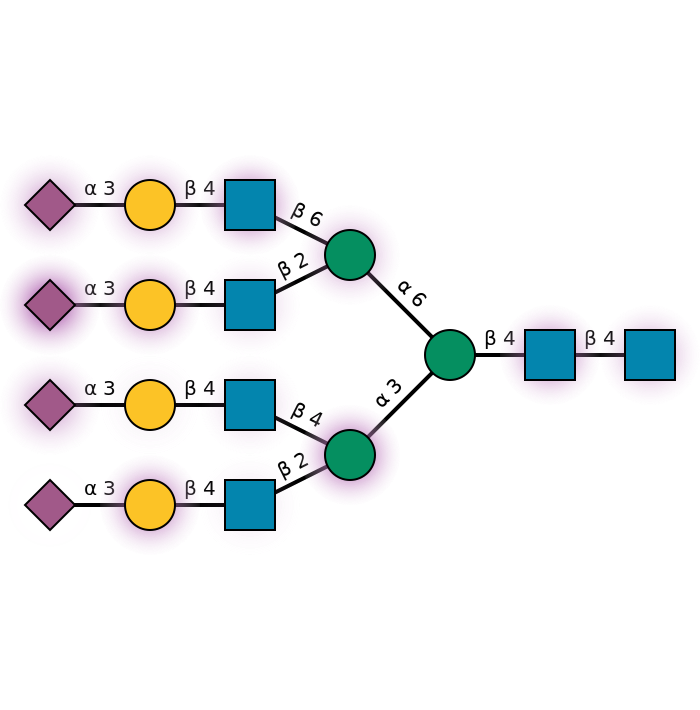

In [54]:


lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g, per_residue= normalized_lst)

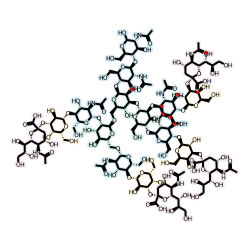

In [52]:
GlycoDraw(g, draw_method='chem2d')

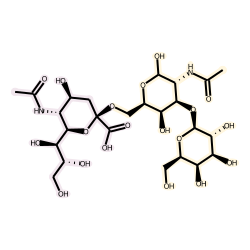

In [42]:
GlycoDraw(g, draw_method='chem2d')

# Test a complete analysis of two given glycans :
- Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
- Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

In [27]:
import mdtraj as md
import numpy as np
import pandas as pd

g1 = "Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"
g2 = "Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

pdbs1 = check_available_pdb("glycans_pdb/"+g1)
pdbs2 = check_available_pdb("glycans_pdb/"+g2)

beta_pdbs1 = [pdb for pdb in pdbs1 if 'beta' in pdb]


beta_pdbs2 = [pdb for pdb in pdbs2 if 'beta' in pdb]


# read all structures and get contact maps
dfs1 = []
atom_dfs1 = []
for f in beta_pdbs1 :
    df = explore_threshold("glycans_pdb/"+g1+"/"+f,g1, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs1.append(dist_table)
mapping_dict1 = df.set_index('residue_number')['IUPAC'].to_dict()


dfs2 = []
atom_dfs2 = []
for f in beta_pdbs2 :
    df = explore_threshold("glycans_pdb/"+g2+"/"+f,g2, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs2.append(dist_table)
mapping_dict2 = df.set_index('residue_number')['IUPAC'].to_dict()


threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glyc

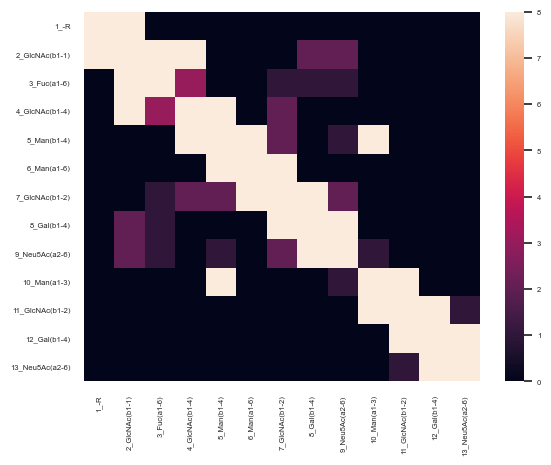

In [28]:
# Need for weighted analyzes based on cluster frequencies

isft1 = inter_structure_frequency_table(dfs1, threshold = 3)
monosaccharide_contact_map(isft1)

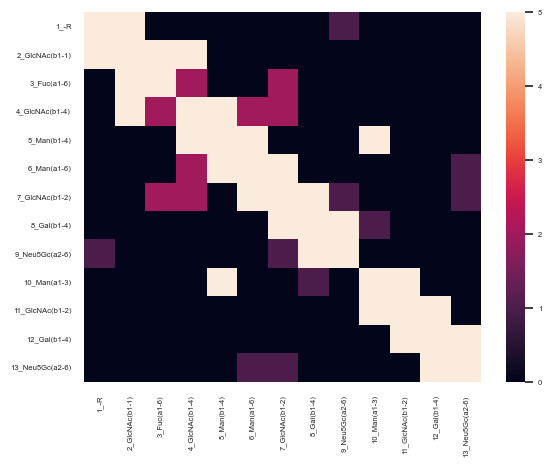

In [29]:
isft2 = inter_structure_frequency_table(dfs2, threshold = 3)
monosaccharide_contact_map(isft2)

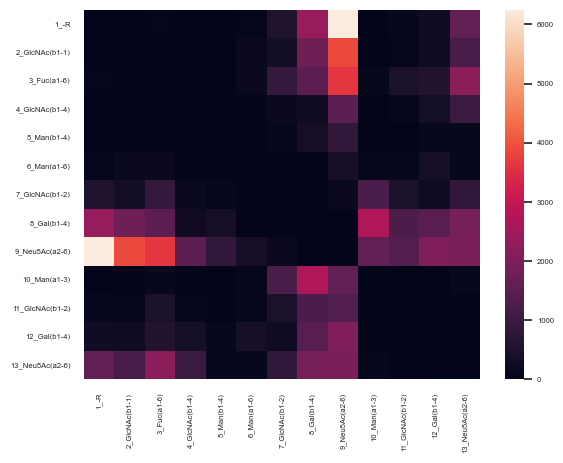

In [30]:
isvt1 = inter_structure_variability_table(dfs1, mode = 'amplify')
monosaccharide_contact_map(isvt1)

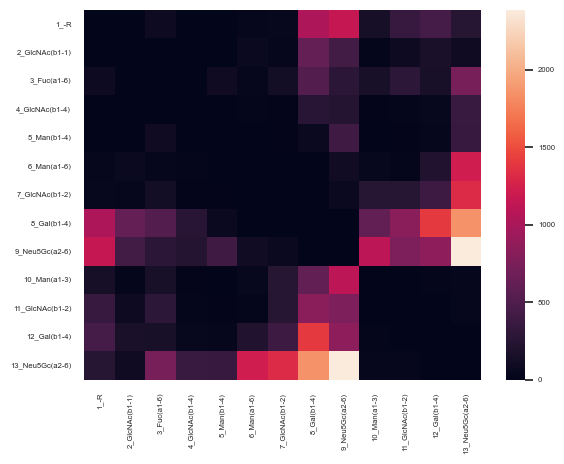

In [31]:
isvt2 = inter_structure_variability_table(dfs2, mode = 'amplify')
monosaccharide_contact_map(isvt2)

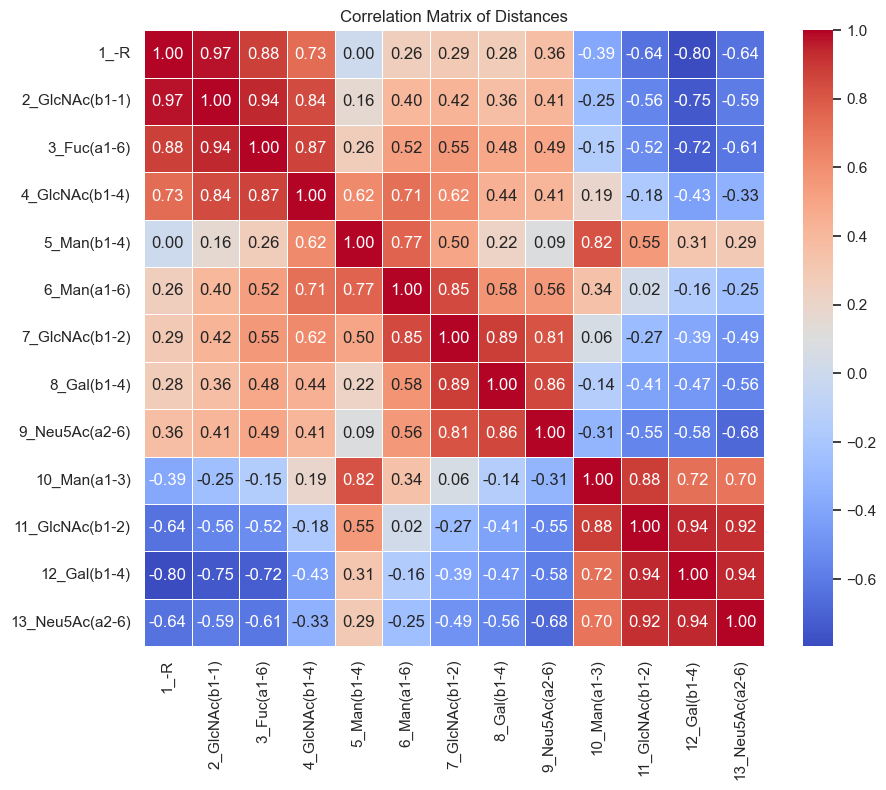

In [32]:
mx1 = make_correlation_matrix(dfs1)
show_correlations(mx1)

icoord[[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [40.0, 40.0, 62.5, 62.5], [12.5, 12.5, 51.25, 51.25], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [115.0, 115.0, 125.0, 125.0], [92.5, 92.5, 120.0, 120.0], [31.875, 31.875, 106.25, 106.25]]
dcoord[[0.0, 0.30596268503517254, 0.30596268503517254, 0.0], [0.0, 0.5547795822826761, 0.5547795822826761, 0.30596268503517254], [0.0, 0.38426619396960504, 0.38426619396960504, 0.0], [0.0, 0.7569920679382068, 0.7569920679382068, 0.0], [0.0, 1.1237042656097547, 1.1237042656097547, 0.7569920679382068], [0.38426619396960504, 1.625983906218547, 1.625983906218547, 1.1237042656097547], [0.5547795822826761, 2.4779890745233346, 2.4779890745233346, 1.625983906218547], [0.0, 0.3418189529572865, 0.3418189529572865, 0.0], [0.0, 0.6033447408060991, 0.6033447408060991, 0.3418189529572865], [0.0, 1.362033582061508, 1.362033582061508, 0.0], [0.6033447408060991, 2.9983450

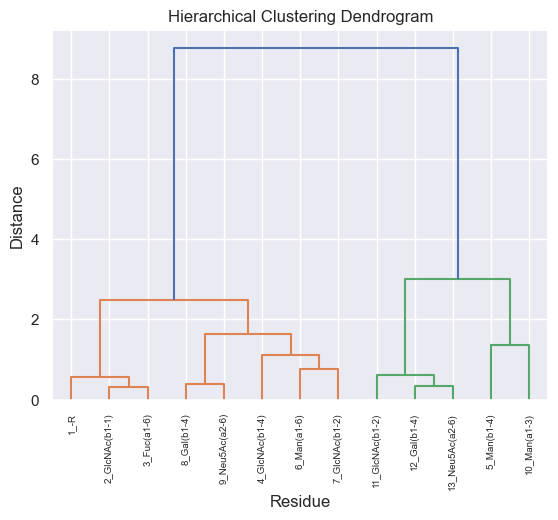

{'C2': ['11_GlcNAc(b1-2)',
  '12_Gal(b1-4)',
  '13_Neu5Ac(a2-6)',
  '5_Man(b1-4)',
  '10_Man(a1-3)'],
 'C1': ['1_-R',
  '2_GlcNAc(b1-1)',
  '3_Fuc(a1-6)',
  '8_Gal(b1-4)',
  '9_Neu5Ac(a2-6)',
  '4_GlcNAc(b1-4)',
  '6_Man(a1-6)',
  '7_GlcNAc(b1-2)']}

In [33]:
show_correlation_dendrogram(mx1, font_size = 7)

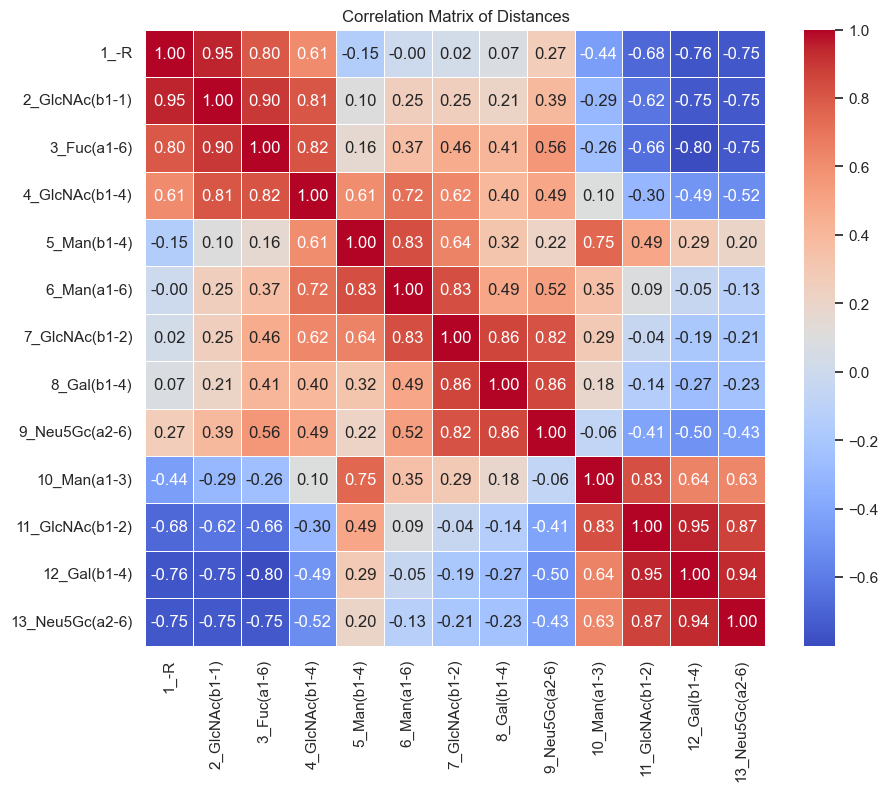

In [34]:
mx2 = make_correlation_matrix(dfs2)
show_correlations(mx2)

icoord[[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [45.0, 45.0, 62.5, 62.5], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [115.0, 115.0, 125.0, 125.0], [92.5, 92.5, 120.0, 120.0], [53.75, 53.75, 106.25, 106.25], [13.75, 13.75, 80.0, 80.0]]
dcoord[[0.0, 0.19288359741509647, 0.19288359741509647, 0.0], [0.0, 0.5915184914310481, 0.5915184914310481, 0.19288359741509647], [0.0, 1.6783369954884686, 1.6783369954884686, 0.5915184914310481], [0.0, 0.42567193799316877, 0.42567193799316877, 0.0], [0.0, 0.8166872461395426, 0.8166872461395426, 0.42567193799316877], [0.0, 1.4434561969382813, 1.4434561969382813, 0.8166872461395426], [0.0, 0.5869756615596321, 0.5869756615596321, 0.0], [0.0, 0.838477806771395, 0.838477806771395, 0.5869756615596321], [0.0, 0.9219425426853205, 0.9219425426853205, 0.0], [0.838477806771395, 2.0463272924318927, 2.0463272924318927, 0.9219425426853205], [1.4434561969382813, 3.8859821

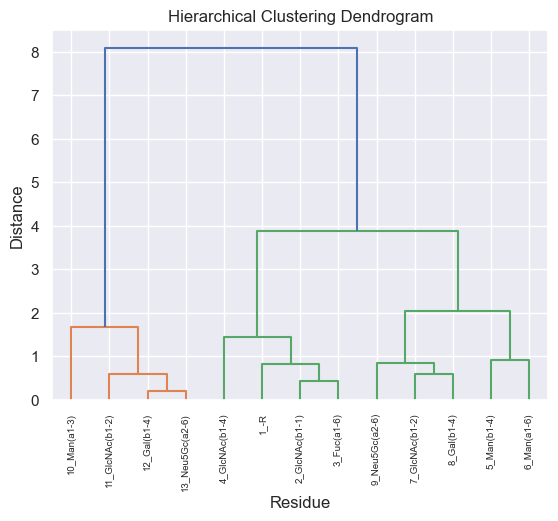

{'C2': ['4_GlcNAc(b1-4)',
  '1_-R',
  '2_GlcNAc(b1-1)',
  '3_Fuc(a1-6)',
  '9_Neu5Gc(a2-6)',
  '7_GlcNAc(b1-2)',
  '8_Gal(b1-4)',
  '5_Man(b1-4)',
  '6_Man(a1-6)'],
 'C1': ['10_Man(a1-3)', '11_GlcNAc(b1-2)', '12_Gal(b1-4)', '13_Neu5Gc(a2-6)']}

In [35]:
show_correlation_dendrogram(mx2, font_size = 7)

In [36]:
residue_overall_stability = {}
for c in isvt1.columns.to_list():
    residue_overall_stability[c] = sum(isvt1[c].to_list())

sorted_residue_overall_stability1 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability1)

[('6_Man(a1-6)', 1508.978964062499), ('5_Man(b1-4)', 1600.3367693750004), ('4_GlcNAc(b1-4)', 3399.7253910000018), ('11_GlcNAc(b1-2)', 3906.8030358749993), ('7_GlcNAc(b1-2)', 4851.117520500002), ('12_Gal(b1-4)', 5663.519403875), ('10_Man(a1-3)', 5946.808373812502), ('2_GlcNAc(b1-1)', 7619.372422750001), ('3_Fuc(a1-6)', 9638.5778665), ('13_Neu5Ac(a2-6)', 10961.03678325), ('1_-R', 11287.093098250005), ('8_Gal(b1-4)', 13604.815732437504), ('9_Neu5Ac(a2-6)', 23484.822785812503)]


In [37]:
residue_overall_stability = {}
for c in isvt2.columns.to_list():
    residue_overall_stability[c] = sum(isvt2[c].to_list())

sorted_residue_overall_stability2 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability2)

[('4_GlcNAc(b1-4)', 960.2108887999996), ('5_Man(b1-4)', 974.4932004800003), ('2_GlcNAc(b1-1)', 1508.691395199999), ('6_Man(a1-6)', 1763.4498820800004), ('10_Man(a1-3)', 2406.9207651199995), ('3_Fuc(a1-6)', 2444.3534139200005), ('7_GlcNAc(b1-2)', 2454.3057811199997), ('11_GlcNAc(b1-2)', 2623.689569279999), ('1_-R', 3509.8846708799997), ('12_Gal(b1-4)', 3686.471112959999), ('8_Gal(b1-4)', 7153.549037759998), ('9_Neu5Gc(a2-6)', 7752.400489600001), ('13_Neu5Gc(a2-6)', 8611.45272784)]


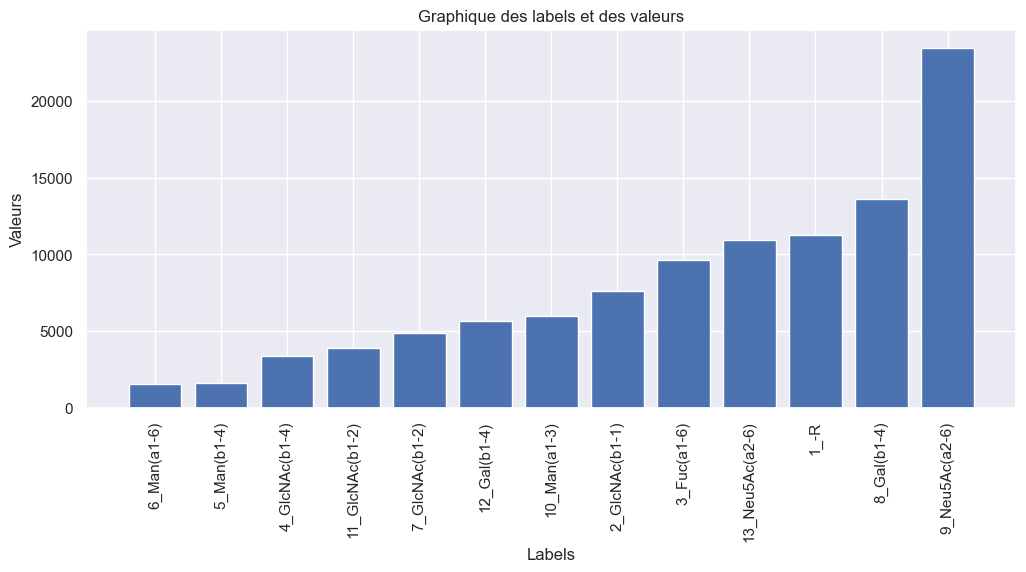

In [38]:
### BETA
labels, values = zip(*sorted_residue_overall_stability1)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g1+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g1+'monosaccharide_instabilities.pdf')

plt.show()

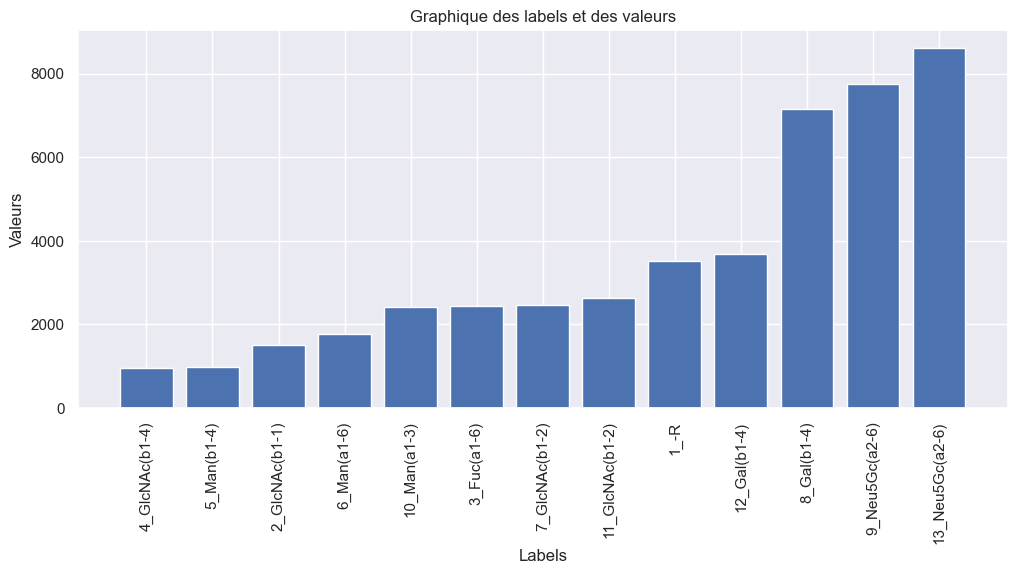

In [72]:
### BETA
labels, values = zip(*sorted_residue_overall_stability2)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g2+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g2+'monosaccharide_instabilities.pdf')

plt.show()

In [42]:
beta_pdbs1

['Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_0.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_1.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_3.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_2.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_6.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_7.pdb',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_beta_5.pdb',
 'Neu5Ac(a2-6)Gal(b1

In [74]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g1+"/"+p for p in beta_pdbs1]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table)


    Monosaccharide_id Monosaccharide  Mean Score  Median Score  \
0                   1            ROH    0.459356      0.445262   
1                   2            NAG    2.101972      2.175594   
2                   3            FUC    1.928251      2.069199   
3                   4            NAG    1.708481      1.637411   
4                   5            MAN    1.067051      1.092679   
5                   6            MAN    1.741718      1.760731   
6                   7            NAG    1.791696      1.587667   
7                   8            GAL    1.533701      1.770560   
8                   9            SIA    3.733794      3.884213   
9                  10            MAN    1.667421      1.755634   
10                 11            NAG    2.077691      2.120481   
11                 12            GAL    1.862583      1.881561   
12                 13            SIA    4.002837      3.983495   

    Weighted Score  Standard Deviation  Coefficient of Variation  
0       

In [75]:
def remap_SASA(SASAdf,mapping_dict):
    SASAdf['Monosaccharide'] = SASAdf['Monosaccharide_id'].map(mapping_dict)
    return(SASAdf)

table = remap_SASA(table,mapping_dict1)


In [76]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g2+"/"+p for p in beta_pdbs2]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table2 = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table2)


    Monosaccharide_id Monosaccharide  Mean Score  Median Score  \
0                   1            ROH    0.391201      0.440199   
1                   2            NAG    2.161725      2.194405   
2                   3            FUC    1.560854      1.391116   
3                   4            NAG    1.637224      1.651024   
4                   5            MAN    1.039806      1.078775   
5                   6            MAN    1.634027      1.828948   
6                   7            NAG    1.273019      1.368901   
7                   8            GAL    1.413325      1.391821   
8                   9            NGC    3.836171      3.768816   
9                  10            MAN    1.552465      1.672047   
10                 11            NAG    2.177047      2.311763   
11                 12            GAL    1.753336      1.754068   
12                 13            NGC    4.014075      4.416178   

    Weighted Score  Standard Deviation  Coefficient of Variation  
0       

In [77]:
table2 = remap_SASA(table2,mapping_dict2)

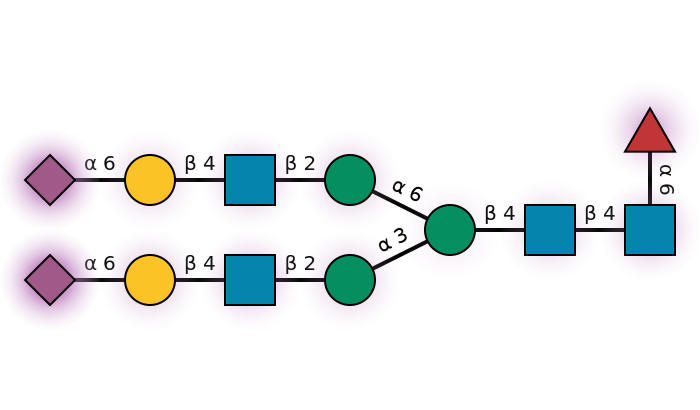

In [78]:
from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
lst = table['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

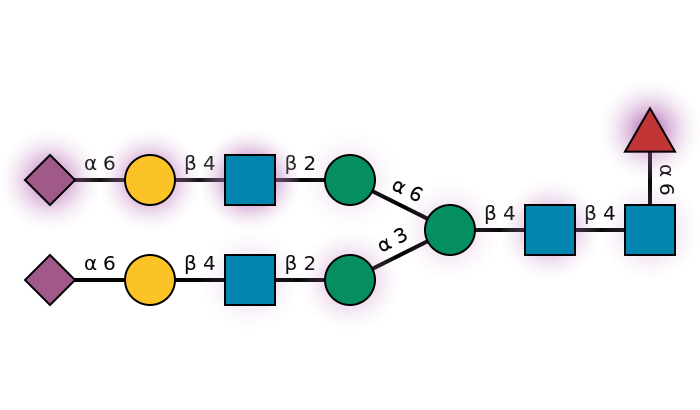

In [79]:

lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

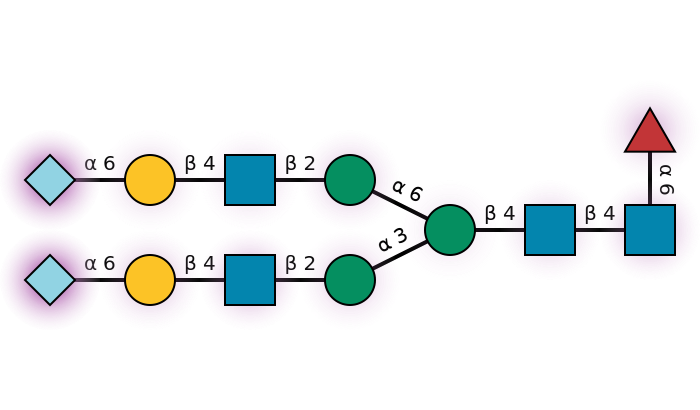

In [80]:
lst = table2['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

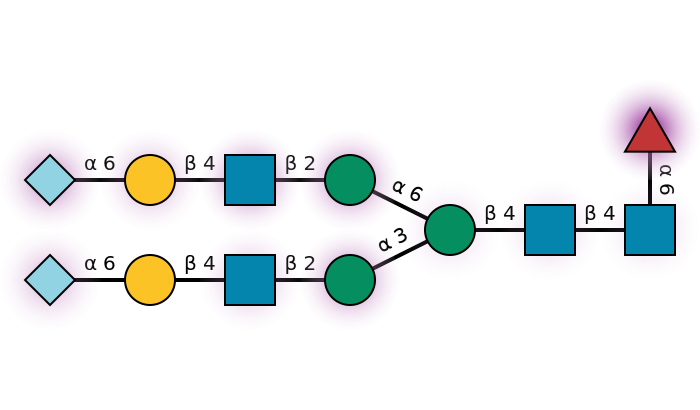

In [81]:
lst = table2['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

In [82]:
table

Monosaccharide_id Monosaccharide  Mean Score  Median Score  \
0                   1             -R    0.459356      0.445262   
1                   2   GlcNAc(b1-1)    2.101972      2.175594   
2                   3      Fuc(a1-6)    1.928251      2.069199   
3                   4   GlcNAc(b1-4)    1.708481      1.637411   
4                   5      Man(b1-4)    1.067051      1.092679   
5                   6      Man(a1-6)    1.741718      1.760731   
6                   7   GlcNAc(b1-2)    1.791696      1.587667   
7                   8      Gal(b1-4)    1.533701      1.770560   
8                   9   Neu5Ac(a2-6)    3.733794      3.884213   
9                  10      Man(a1-3)    1.667421      1.755634   
10                 11   GlcNAc(b1-2)    2.077691      2.120481   
11                 12      Gal(b1-4)    1.862583      1.881561   
12                 13   Neu5Ac(a2-6)    4.002837      3.983495   

    Weighted Score  Standard Deviation  Coefficient of Variation  
0         0.459356            0.028649                  0.062368  
1         2.101972            0.252975                  0.120351  
2         1.928251            0.397044                  0.205909  
3         1.708481            0.323541                  0.189373  
4         1.067051            0.114625                  0.107422  
5         1.741718            0.155013                  0.089000  
6         1.791696            0.519448                  0.289920  
7         1.533701            0.364163                  0.237441  
8         3.733794            0.775726                  0.207758  
9         1.667421            0.251322                  0.150725  
10        2.077691            0.212517                  0.102285  
11        1.862583            0.063263                  0.033965  
12        4.002837            0.133067                  0.033243

In [83]:
table2

Monosaccharide_id Monosaccharide  Mean Score  Median Score  \
0                   1             -R    0.391201      0.440199   
1                   2   GlcNAc(b1-1)    2.161725      2.194405   
2                   3      Fuc(a1-6)    1.560854      1.391116   
3                   4   GlcNAc(b1-4)    1.637224      1.651024   
4                   5      Man(b1-4)    1.039806      1.078775   
5                   6      Man(a1-6)    1.634027      1.828948   
6                   7   GlcNAc(b1-2)    1.273019      1.368901   
7                   8      Gal(b1-4)    1.413325      1.391821   
8                   9   Neu5Gc(a2-6)    3.836171      3.768816   
9                  10      Man(a1-3)    1.552465      1.672047   
10                 11   GlcNAc(b1-2)    2.177047      2.311763   
11                 12      Gal(b1-4)    1.753336      1.754068   
12                 13   Neu5Gc(a2-6)    4.014075      4.416178   

    Weighted Score  Standard Deviation  Coefficient of Variation  
0         0.391201            0.110258                  0.281844  
1         2.161725            0.194027                  0.089756  
2         1.560854            0.439146                  0.281350  
3         1.637224            0.163612                  0.099933  
4         1.039806            0.092718                  0.089169  
5         1.634027            0.335535                  0.205342  
6         1.273019            0.265878                  0.208856  
7         1.413325            0.205850                  0.145650  
8         3.836171            0.656221                  0.171062  
9         1.552465            0.310878                  0.200248  
10        2.177047            0.286881                  0.131775  
11        1.753336            0.064765                  0.036938  
12        4.014075            0.518633                  0.129204

# Get cluster frequencies + Analysis

In [3]:
import requests
import json

# Send a GET request to the URL
response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    # Extract the IUPAC sequence and cluster values
    for key, value in data.items():
        iupac_sequence = value["iupac"]
        clusters = value["clusters"]
        print(f"ID: {key}")
        print(f"IUPAC sequence: {iupac_sequence}")
        print("Cluster values:")
        for cluster, cluster_value in clusters.items():
            print(f"{cluster}: {cluster_value}")
        print("\n")
else:
    print("Failed to retrieve data from the URL.")


ID: GS00180
IUPAC sequence: Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc
Cluster values:
Cluster 0: 39.91
Cluster 1: 38.71
Cluster 2: 21.39


ID: GS00098
IUPAC sequence: Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Cluster values:
Cluster 0: 47.01
Cluster 1: 37.12
Cluster 2: 15.88


ID: GS00039
IUPAC sequence: GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
Cluster values:
Cluster 0: 37.87
Cluster 1: 35.18
Cluster 2: 20.42
Cluster 3: 6.52


ID: GS00307
IUPAC sequence: Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man
Cluster values:
Cluster 0: 25.84
Cluster 1: 22.25
Cluster 2: 20.15
Cluster 3: 14.47
Cluster 4: 11.27
Cluster 5: 6.02


ID: GS00060
IUPAC sequence: Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)

In [5]:
iupac_sequence

'Gal(b1-4)Gal(a1-3)[2-4-diacetimido-2-4-6-trideoxyhexose]'

In [6]:
import requests
import json

def get_all_clusters_frequency():
    # Send a GET request to the URL
    response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

    # Initialize an empty dictionary to store the data
    data_dict = {}

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON data
        data = response.json()

        # Extract the IUPAC sequence and cluster values
        for key, value in data.items():
            iupac_sequence = value["iupac"]
            clusters = [value["clusters"][key] for key in value["clusters"]]
            data_dict[iupac_sequence] = clusters
    else:
        print("Failed to retrieve data from the URL.")

    # Print the dictionary
    print(data_dict)
    return(data_dict)

def get_glycan_clusters_frequency(glycan):
    all_frequencies = get_all_clusters_frequency()
    return(all_frequencies[glycan])

get_glycan_clusters_frequency(iupac_sequence)

{'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc': [39.91, 38.71, 21.39], 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc': [47.01, 37.12, 15.88], 'GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA': [37.87, 35.18, 20.42, 6.52], 'Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man': [25.84, 22.25, 20.15, 14.47, 11.27, 6.02], 'Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.82, 23.4, 23.32, 10.93, 9.12, 6.4], 'GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc': [28.1, 26.23, 19.92, 14.99, 10.76], 'Neu5Ac(a2-3)Gal(a1-4)Gal(b1-4)Glc': [31.22, 29.73, 26.49, 12.55], 'GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.02, 20.51, 17.8

[29.31, 20.61, 19.96, 14.42, 9.13, 3.49, 1.43, 1.15, 0.5]

In [42]:
#get glycans for which there is one major cluster vs others
all_frequencies = get_all_clusters_frequency()

glycans_with_major_cluster = []
glycans_without_major_cluster = []

for key in all_frequencies :
    try :
        nb_clust = len(all_frequencies[key])
        #print(100/nb_clust)
        if float(all_frequencies[key][0]) > 70:
            glycans_with_major_cluster.append(key)
            print(key+ ' ' + str(all_frequencies[key][0]))
        else :
            glycans_without_major_cluster.append(key)
    except:
        pass

print(len(glycans_with_major_cluster))
print(len(glycans_without_major_cluster))


{'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc': [39.91, 38.71, 21.39], 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc': [47.01, 37.12, 15.88], 'GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA': [37.87, 35.18, 20.42, 6.52], 'Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man': [25.84, 22.25, 20.15, 14.47, 11.27, 6.02], 'Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.82, 23.4, 23.32, 10.93, 9.12, 6.4], 'GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc': [28.1, 26.23, 19.92, 14.99, 10.76], 'Neu5Ac(a2-3)Gal(a1-4)Gal(b1-4)Glc': [31.22, 29.73, 26.49, 12.55], 'GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.02, 20.51, 17.8

In [8]:
#function to determine 1-many cluster glycans
def glycan_cluster_pattern(threshold = 70) :
    # threshold is the proportion the first cluster must have to be considered as a unique major cluster
    # If the first cluster proportion is lower, then this glycan is assumed to be represented by multiple structural clusters
    
    all_frequencies = get_all_clusters_frequency()

    glycans_with_major_cluster = []
    glycans_without_major_cluster = []

    for key in all_frequencies :
        try :
            nb_clust = len(all_frequencies[key])
            #print(100/nb_clust)
            if float(all_frequencies[key][0]) >= threshold:
                glycans_with_major_cluster.append(key)
            else :
                glycans_without_major_cluster.append(key)
        except:
            pass
    
    print("Number of glycans with one major cluster: " + str(len(glycans_with_major_cluster)))
    print("Number of glycans without a major cluster: " + str(len(glycans_without_major_cluster)))

    return(glycans_with_major_cluster,glycans_without_major_cluster)

glycan_cluster_pattern()

{'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc': [39.91, 38.71, 21.39], 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc': [47.01, 37.12, 15.88], 'GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA': [37.87, 35.18, 20.42, 6.52], 'Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man': [25.84, 22.25, 20.15, 14.47, 11.27, 6.02], 'Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.82, 23.4, 23.32, 10.93, 9.12, 6.4], 'GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc': [28.1, 26.23, 19.92, 14.99, 10.76], 'Neu5Ac(a2-3)Gal(a1-4)Gal(b1-4)Glc': [31.22, 29.73, 26.49, 12.55], 'GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc': [26.02, 20.51, 17.8

(['Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'IdoA2S(a1-4)GlcNS6S',
  'Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)][Fuc(a1-3)]GlcNAc',
  'Gal(b1-4)Glc',
  'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Fuc',
  'Fuc(a1-3)[Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)]GlcNAc(b1-4)Glc',
  'Man',
  'GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc',
  'Man(a1-3)[Xyl(b1-2)][Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
  'GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA',
  'GalNAc(b1-3)GlcNAc(b1-4)Man',
  'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(b1-4)[Fuc(a1-3)]GlcNAc',
  '

In [35]:
from glycowork.motif.draw import GlycoDraw
for g in glycans_with_major_cluster:
    print(g)


Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S
Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)][Fuc(a1-3)]GlcNAc
Gal(b1-4)Glc
GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal

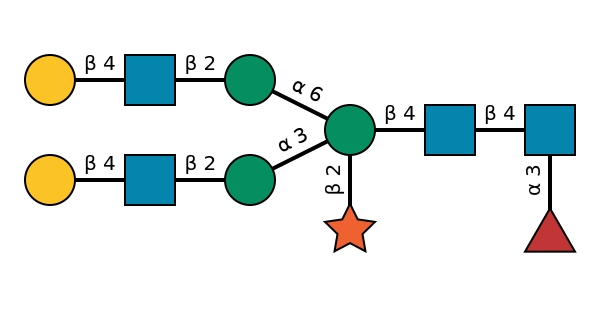

In [37]:
GlycoDraw('Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc')

In [15]:
for g in glycans_without_major_cluster:
    print(g)

Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man
Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc
Neu5Ac(a2-3)Gal(a1-4)Gal(b1-4)Glc
GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)Glc